# DEA accredited projects analysis 2019-2025

## Executive sumamry
This analysis examines UK government's £100+ million investment in data infrastructure accessed through the Digital Economy Act 2017 (DEA), which has enabled unprecedented access to linked administrative datasets for public benefit research. Using web-scraped data from the public register of DEA-accredited projects (2019-2025), This analysis quantifies dataset usage patterns and analyses research themes to inform infrastructure planning and investment decisions. Findings reveal explosive growth in demand: over 1,000 projects have been approved under the DEA since 2019, with requests for access to ADR England flagship datasets experiencing 345% growth from 2021-2024 (doubling every 1.4 years). Growth in demand for these datasets has been driven primarily by the Longitudinal Education Outcomes (LEO) and Data First collections, with Education and Child Health Insights from Linked Data (ECHILD) emerging as most rapidly growing in demand since it became available in 2024. Text analysis of project titles identified four dominant research clusters (business/productivity, inequalities, health/social care, and labour markets/education), with health and education topics quadrupling in prevalence, while COVID-19 research demonstrated the system's agility - rising to 13.5% of projects during the pandemic before declining to 2.7%. Trends indicate that current growth trajectories could generate 240 flagship dataset requests by 2026 and over 1,000 by 2029, requiring proactive infrastructure scaling, strategic resource allocation to high-demand datasets, and streamlined approval processes to prevent bottlenecks that could constrain high-value research supporting evidence-based policymaking.

## Strategic context
The UK government has begun positioning high-quality data as critical national infrastructure, investing over £100 million in the ADR UK program alone since 2018. The Digital Economy Act 2017 (DEA) has created unprecedented opportunities for streamlined access to survey and large-scale, linked public administrative datasets for research in the public good. As this data becomes increasingly important for evidence-based policymaking, particularly to address complex and cross-cutting challenges like productivity gaps and social and health inequalities, understanding how this investment translates into impact is crucial. 

Public funders need evidence that national datasets deliver research impact that justifies their development and maintenance costs, and help identify where future resources should be concentrated to support their use. Simultaneously, tracking the evolution of research themes provides early intelligence on emerging policy challenges and scientific opportunities, ensuring infrastructure keeps pace with researcher demand. With research access requests under the DEA steadily increasing (and likely to accelerate in future, given growth in the availability of valuable large-scale linked administrative data that programmes like ADR UK are driving forward), understanding demand trajectories is critical for capacity planning, from project approval pipelines to the secure environments that support data access, so that infrastructure does not become a bottleneck to the very research it was designed to support.

## Aims of the project 
This analysis aims to help understand how publicly-funded data infrastructure is supporting public policy research, what the relative demand for different sensitive datasets is, and how research interests using this data have evolved over time.

### Part 1: Quantifying dataset usage in DEA-accredited research
- Measure how many research projects have been approved under the DEA since the public register of projects began (Q4 2019).
- Track which datasets have been requested most often to identify demand patterns across all available data resources.
- Assess the uptake and growth of ADR UK flagship datasets specifically. These are large-scale, linked administrative datasets representing significant public investment and research value. This analysis focuses on [ADR England flagship datasets](https://www.adruk.org/data-access/flagship-datasets/?tx_llcatalog_pi%5Bfilters%5D%5Bpartners%5D=766&cHash=352fa45e86742c514f344c3d0b418a73) (as flagship datasets from other ADR UK partners from the devolved administration are largely not present in the public register dataset), examining both overall usage trends and patterns within individual collections.

### Part 2: Understanding shifts in research focus over time
- Use text analysis of project titles to identify dominant themes in research.
- Track emerging and declining research topics using frequency and TF-IDF metrics to understand how research priorities evolve.
- Provide visual summaries to show how topic focus has changed over time, revealing trends in policy research interests.

## Approach:

### Part 1: Dataset access trends
(All code available on [github](https://github.com/balintstewart77/ADR_DEA_project)), main project notebook [here](https://github.com/balintstewart77/ADR_DEA_project/blob/main/analysis/DEA_projects_analysis.ipynb)
- Scraped and cleaned public data on all research projects approved under the DEA from 2019 (when records in the public register began) onward: [UK Statistics Authority website](https://uksa.statisticsauthority.gov.uk/digitaleconomyact-research-statistics/better-useofdata-for-research-information-for-researchers/list-of-accredited-researchers-and-research-projects-under-the-research-strand-of-the-digital-economy-act/)
- Filtered to exclude projects under a different legal gateway (SRSA 2007 - a gateway limited to research for purely statistical purposes) to ensure a focus on Digital Economy Act approved-research. 
- Categorised datasets and grouped some into collections (e.g., “Data First” and “Wage and Employment Dynamics”) for clarity.
- Visualised the growth in use of ADR UK flagship datasets as a whole and split by collection, quarter by quarter.
- Calculated compounded growth rates for these.
- Created summary tables and visualisations showing trends and growth over time, which can be easily copied into reports.

### Part 2: Topic trends in research 
- Analysed the titles of research projects to understand what topics are being studied.
- Applied natural language processing to clean and process this text data.
- Used TF-IDF scoring to identify the most distinctive keywords per year or quarter.
- Tracked which terms are growing or declining in usage across time.
- Presented topic trends visually via word clouds and line charts.

## Summary of findings
### Part 1: Dataset access trends
**Overall Dataset Popularity**
- Over 1000 projects have been approved under the DEA between 2019 and 14 May 2025 (Figure 1)
- The Business Structure Database (220 requests), Annual Business Survey (191 requests) and the Annual Survey of Hours and Earnings (158) are the three most frequently requested datasets across all of these projects (Figure 2)

**ADR England Flagship Datasets**
- The number of requests for ADR England flagship datasets **more than quadrupled** from 20 approved requests in 2021 to 89 requests in 2024 (growth rate of 345%) (Figure 3). Growth in access requests has been itself accelerating, with year-on-year growth rate increases of +40% (2021 -> 2022), +57% (2022 -> 2023), and 102% (2023 -> 2024) (Figure 4)
- This equates to a **doubling in the use of flagship datasets around every 1.4 years** on average over the observed annual time period.

The demand for these datasets can be split into roughly 3 phases:
- **2021-2022: Foundation phase**. Started with 20 requests in 2021, saw 40% growth in access requests in year two
- **2023: Breakthrough year**. Saw 57% growth, reaching 44 projects in that year and more consistency in access requests (volatility fell from 84% (2021 coefficient of variation = 0.84) to 26% (2023 coefficient of variation = 0.26))
- **2024: Acceleration phase**. Doubling of requests for flagship datasets to 89, with the steady quarterly growth (11 → 21 → 26 → 31 access requests) maintained into Q1 of 2025 (37 access requests)

The Longitudinal Education Outcomes (37% of all flagship dataset access requests) and Data First collections (22% of all flagship dattaset access requests, although this count doesn't include the popular MoJ-DfE linkage dataset which is not accessed through the DEA) are the most accessed flagship datasets overall. ECHILD shows the most rapid growth in use among flagship dataset collections, with a total of 23 access requests in just the three quarters its been available.


### Part 2: Topic trends in research 
**Research Theme Clusters**
Analysis of project title distinctiveness by year reveals that DEA-accredited research over the past six years broadly speaking falls into four distinct thematic clusters:

- Cluster 1: Business, growth, and productivity
- Cluster 2: Gender and ethnic inequalities and gaps
- Cluster 3: Health, social care, and children
- Cluster 4: Labour market, skills, and education

**Evolving Research Priorities**
Tracking term frequency over time reveals three distinct patterns in research focus:
- Stable research areas maintain consistent presence, with terms like 'labour', 'market', 'employment', and 'productivity' appearing at steady rates across all years, indicating sustained policy interest in economic research.
- Growing research areas show dramatic expansion, particularly health and education topics. The term 'health' has more than tripled from appearing in 3.8% of project titles in 2021 to 12% in 2025, while 'education' has quadrupled from 3.4% in 2020 to 14% in 2025. 
- Research areas showing both growth and decline demonstrate the system's responsiveness to changing priorities. COVID-19 research peaked at 13.5% of all project titles during the pandemic but has since declined sharply to just 2.7% in 2024, showing how the research ecosystem adapts as policy priorities evolve.

# Strategic Implications 

**Infrastructure Investment Requirements**:
The 345% growth in flagship dataset usage over the observed time period demonstrates exceptional return on public investment, but may also signal upcoming capacity pressures. Although projects using ADR England flasghip datasets have historically represented a small fraction of overall projects approved through the DEA, if current trends continue, ADR UK and the ONS Secure Research Service can expect approximately 240 access requests for ADR England flagship datasets in 2026, rising to over 1000 by 2029 — representing a 50-fold increase from 2021 baseline levels. In the absence of the emergence of other limitations (e.g. research funding, trained researcher capacity etc.) this explosive growth is likely to considerably increase future demand on the ONS SRS, requiring proactive infrastructure scaling to prevent approval bottlenecks that could constrain high-value research. 

**Resource Allocation Priorities**
LEO and Data First collections account for 59% of all flagship access requests, suggesting opportunities for further investment and enhancement of these datasets with new linkages, training, metadata enhancement etc. Conversely, datasets with much fewer requests may warrant review for useability and utility or targeted promotion to increase use. The shift toward health and education research themes, indicates growing demand for linked administrative data in these sectors.

**Policy Research Readiness**
The rapid emergence and decline of COVID-19 research (from 13.5% to 2.7% of project titles in just 2 years) demonstrates the system's ability to respond to urgent policy needs. However, maintaining this agility at a much greater scale will require streamlined approval processes and enhanced secure environment capacity.

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [391]:
df = pd.read_csv('C:/Users/balin/Desktop/ADR_DEA_project/data/dea_accredited_projects.csv')

In [392]:
df.head()

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act (2017),Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,10/25/2019
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act (2017),Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,10/25/2019
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act (2017),Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,10/14/2019
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,10/14/2019
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,11/19/2019


In [393]:
df.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              1
Secure Research Service    0
Accreditation Date         0
dtype: int64

In [394]:
missing_researchers = df[df['Researchers'].isna()]

In [395]:
missing_datasets = df[df['Datasets Used'].isna()]

In [396]:
# Drop rows with missing datasets used
df = df.dropna(subset=['Datasets Used'])

In [397]:
df.head()

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act (2017),Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,10/25/2019
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act (2017),Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,10/25/2019
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act (2017),Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,10/14/2019
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,10/14/2019
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,11/19/2019


In [398]:
df['Legal Basis'].value_counts()

Legal Basis
Digital Economy Act (2017)                                                                                                                                                                                                                                                       1023
Statistics and Registration Services Act 2007 (SRSA) - Approved Researcher Gateway: added data after 9 September 2021                                                                                                                                                              98
Digital Economy Act 2017                                                                                                                                                                                                                                                           18
Statistics and Registration Services Act 2007 (SRSA) - Approved Researcher Gateway: added data after 9 September 2021s Act 2007 (SRSA) - Approved Research

In [399]:
# Clean Legal Basis column by removing SRSA rows
df = df[~df['Legal Basis'].str.contains('SRSA', na=False)]
# tidy up DEA labels
df['Legal Basis'] = df['Legal Basis'].str.replace('Digital Economy Act (2017)', 'Digital Economy Act 2017')
df['Legal Basis'].value_counts()

Legal Basis
Digital Economy Act 2017    1041
Name: count, dtype: int64

In [400]:
df.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              0
Secure Research Service    0
Accreditation Date         0
dtype: int64

In [401]:
problematic_dates = df[pd.isna(pd.to_datetime(df['Accreditation Date'], errors='coerce'))]
print(problematic_dates['Accreditation Date'].unique())

['2020-06-11' '2020-12-07' '2021-11-02' '2021-09-14' '2021-09-24'
 '2021-09-17' '2021-10-05' '2021-10-13' '2021-10-26' '2021-10-12'
 '2021-12-10' '2021-03-15' '2023-01-18' '2023-03-06' '2023-03-09'
 '2023-01-03' '2023-04-05' '2023-01-30' '2023-01-17' '2023-04-19'
 '2023-01-20' '2023-02-03' '2023-01-19' '2023-03-02' '2023-03-05'
 '2023-03-21' '2023-04-11' '2023-03-31' '2023-01-11' '2023-03-07'
 '2023-04-04' '2023-02-10' '2023-01-04' '2023-03-20' '2023-01-23'
 '2023-03-03' '2023-02-16' '2023-02-07' '2023-03-23' '2023-02-13'
 '2023-02-24' '2023-04-18' '2023-02-15' '2023-01-22' '2023-03-27'
 '2023-02-22' '2023-01-06' '2023-04-13' '2023-01-13' '2023-01-16'
 '2023-02-02' '2023-03-08' '2023-04-06' '2023-03-24' '2023-03-30'
 '2023-05-02' '2023-05-09' '2023-05-24' '2023-06-02' '2023-06-07'
 '2023-06-13' '2023-06-19' '2023-06-20' '2023-06-22' '2023-05-12'
 '2023-06-05' '13/07/2023' '28/07/2023' '31/07/2023' '17/08/2023'
 '18/08/2023' '30/08/2023' '18/09/2023' '19/09/2023' '20/09/2023'
 '27/09/20

In [402]:
def parse_mixed_dates(date_str):
    """Parse dates that could be in YYYY-MM-DD or DD/MM/YYYY format"""
    if pd.isna(date_str):
        return pd.NaT
    
    date_str = str(date_str).strip()
    
    # Try ISO format first (YYYY-MM-DD)
    if '-' in date_str:
        try:
            return pd.to_datetime(date_str, format='%Y-%m-%d')
        except:
            pass
    
    # Try DD/MM/YYYY format
    if '/' in date_str:
        try:
            return pd.to_datetime(date_str, format='%d/%m/%Y')
        except:
            pass
    
    # Fallback to pandas inference
    try:
        return pd.to_datetime(date_str)
    except:
        return pd.NaT

# Apply the custom parser
df['Accreditation Date'] = df['Accreditation Date'].apply(parse_mixed_dates)

# Create quarter and year columns
df['Accreditation Date Quarter'] = df['Accreditation Date'].dt.to_period('Q')
df['Accreditation Date Year'] = df['Accreditation Date'].dt.year
df['quarter_date'] = df['Accreditation Date Quarter'].dt.to_timestamp(how='start')
df['Quarter Label'] = df['Accreditation Date Quarter'].apply(
    lambda p: f"Q{p.quarter} {p.year}" if pd.notna(p) else None
)

# Check for any remaining problematic dates
remaining_nans = df[df['Accreditation Date'].isna()]
print(f"Remaining NaN dates: {len(remaining_nans)}")
if len(remaining_nans) > 0:
    print("Original values that couldn't be parsed:")
    print(remaining_nans['Accreditation Date'].unique())

Remaining NaN dates: 0


In [403]:
df.isna().sum()

Project ID                    0
Title                         0
Researchers                   2
Legal Basis                   0
Datasets Used                 0
Secure Research Service       0
Accreditation Date            0
Accreditation Date Quarter    0
Accreditation Date Year       0
quarter_date                  0
Quarter Label                 0
dtype: int64

In [404]:
# Dataset has single entry in 2019Q1, likely a typo (rest of data starts from 2019Q4), fix manually
df.loc[16, 'Accreditation Date Quarter'] = '2019Q4'

In [405]:
import re

def extract_datasets(row):
    """
    Extract dataset names from the 'Datasets Used' column.
    Handles multiple data sources and newlines, but doesn't filter values.
    """
    if pd.isna(row) or row == "":
        return []
    
    # Replace newlines and normalize other separators
    processed = row.replace("\n", ";").replace("\\n", ";")
    
    results = []
    
    # Split by semicolons to handle multiple data sources
    for entry in processed.split(";"):
        entry = entry.strip()
        if not entry:
            continue
        
        # Handle the case with or without a data source (colon)
        if ":" in entry:
            # Split only on the first colon
            parts = entry.split(":", 1)
            datasets = parts[1].strip()
            
            # Skip if there's nothing after the colon
            if not datasets:
                continue
        else:
            datasets = entry
        
        # Split by commas and process each dataset
        for ds in datasets.split(","):
            ds = ds.strip()
            
            # Only skip empty strings
            if not ds:
                continue
            
            results.append(ds)
    
    return results

In [406]:
# lowercase the datasets used column
df["datasets_clean"] = df["Datasets Used"].str.lower()

# apply the function to create a list of dataset names
df["dataset_list"] = df["datasets_clean"].apply(lambda x: extract_datasets(x) if pd.notnull(x) else [])

# explode the dataset list to one dataset per row
df_exploded = df.explode("dataset_list")

In [407]:
df_exploded[df_exploded['Datasets Used'].str.contains("Wales")]

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act 2017,Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,2019-10-14,2019Q4,2019,2019-10-01,Q4 2019,office for national statistics: crime survey f...,crime survey for england and wales
24,2020/003,Spatial sorting in housing and employment: imp...,"Lars Nesheim, University College London",Digital Economy Act 2017,Office for National Statistics: Annual Survey ...,Office for National Statistics Secure Research...,2020-01-17,2020Q1,2020,2020-01-01,Q1 2020,office for national statistics: annual survey ...,annual survey of hours and earnings
24,2020/003,Spatial sorting in housing and employment: imp...,"Lars Nesheim, University College London",Digital Economy Act 2017,Office for National Statistics: Annual Survey ...,Office for National Statistics Secure Research...,2020-01-17,2020Q1,2020,2020-01-01,Q1 2020,office for national statistics: annual survey ...,census 2011 england and wales: individual sample
24,2020/003,Spatial sorting in housing and employment: imp...,"Lars Nesheim, University College London",Digital Economy Act 2017,Office for National Statistics: Annual Survey ...,Office for National Statistics Secure Research...,2020-01-17,2020Q1,2020,2020-01-01,Q1 2020,office for national statistics: annual survey ...,census 2011 origin/destination: flow data & bu...
33,2020/013,Firm-level analysis of research and development,"Joelle Tasker, Office for National Statistics\...",Digital Economy Act 2017,Office for National Statistics: Business Expen...,Office for National Statistics Secure Research...,2020-03-16,2020Q1,2020,2020-01-01,Q1 2020,office for national statistics: business expen...,business expenditure on research and developme...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2025/104,"Dissociative seizures in Wales - epidemiology,...","Owen Pickrell, Swansea University\nArron Lacey...",Digital Economy Act 2017,SAIL Databank: Census Wales 2021,SAIL,2025-04-14,2025Q2,2025,2025-04-01,Q2 2025,sail databank: census wales 2021,census wales 2021
1129,2025/109,Researching intimate partner violence and abus...,"Valeria Skafida, University of Edinburgh\nChri...",Digital Economy Act 2017,Office for National Statistics: Crime Survey f...,UK Data Service,2025-05-08,2025Q2,2025,2025-04-01,Q2 2025,office for national statistics: crime survey f...,crime survey for england and wales
1138,2025/027,Migration Observatory analysis of internationa...,"Ben Brindle, University of Oxford\nMadeleine \...",Digital Economy Act 2017,Office for National Statistics: Census 2021 \n...,IDS,2025-02-04,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: census 2021 \n...,census 2021
1138,2025/027,Migration Observatory analysis of internationa...,"Ben Brindle, University of Oxford\nMadeleine \...",Digital Economy Act 2017,Office for National Statistics: Census 2021 \n...,IDS,2025-02-04,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: census 2021 \n...,england and wales


In [408]:
# Handle common suffixes in dataset names to simplify and standardise them (at the cost of some geographic coverage information)
def remove_suffixes(dataset_name):
    """
    Remove common suffixes from dataset names to standardise them.
    """
     # Normalize dashes
    dataset_name = dataset_name.replace("–", "-").replace("—", "-")
    suffixes = ["- uk",
                "- england",
                "- great britain",
                "- gb",
                "- england and wales",
                "- wales",
                "srs iteration 1 standard extract",
                "srs iteration 2 standard extract",
                "uk",
                "person",
                "-ofqual-dfe-ucas",
                "wave 1",
                "wave 2 - exclusions",
                "wave 2",
                " - ",
                "finalised",
                "individual"]
    for suffix in suffixes:
        if dataset_name.endswith(suffix):
            dataset_name = dataset_name[:-len(suffix)].strip()
    return dataset_name

In [409]:
# Clean up dataset abbreviated names and mismatches
def clean_dataset_names_replace(dataset_name):
    """
    Clean up dataset names with common abbreviations or mismatches.
    """
    replacements = {
        "leo via": "longitudinal education outcomes",
        "leo": "longitudinal education outcomes",
        "longitudinal education outcomes srs iteration 1 standard extract - englanddfe": "longitudinal education outcomes",
        "longitudinal study": "ons longitudinal study",
        "ucas grading and admissions data": "grading and admissions data england",
        "2011 census": "census 2011",
        "labour force survey & labour force survey": "labour force survey",
        "ministry of justice data first crown court defendant": "data first: crown court dataset",
        "moj data first crown court defendant case level dataset": "data first: crown court dataset",
        "moj data first crown court defendant": "data first: crown court dataset",
        "retired ministry of justice data first crown court defendant": "data first: crown court dataset",
        "moj data first magistrates' court defendant": "data first: magistrates court dataset",
        "retired ministry of justice data first magistrates court defendant": "data first: magistrates court dataset",
        "ministry of justice data first magistrates court iteration 2": "data first: magistrates court dataset",
        "ministry of justice data first prisoner custodial journey": "data first: prisoner dataset",
        "moj data first prisoner custodial journey": "data first: prisoner dataset",
        "moj data first prisoner custodial journey level dataset": "data first: prisoner dataset",
        "moj data first linked criminal courts defendant case level dataset & moj data first magistrates' court defendant case level dataset": "data first: cross-justice system linking dataset",
        "data first: linked criminal courts dataset": "data first: cross-justice system linking dataset",
        "moj data first linked criminal courts and prisons defendant": "data first: cross-justice system linking dataset",
        "moj data first linked criminal courts defendant case level dataset": "data first: cross-justice system linking dataset",
        "moj data first prisoner custodial journey dataset": "data first: prisoner dataset",
        "data first prison iteration 2": "data first: prison dataset",
        "ministry of justice data first probation iteration 2": "data first: probation dataset",
        "ministry of justice data first crown court iteration 2": "data first: crown court dataset",
        "data first family court": "data first: family court dataset",
        "moj data first family court data extract": "data first: family court dataset",
        "data first familyman family court data": "data first: family court dataset",
        "ministry of justice data first probation": "data first: probation dataset",
        "quarterly labour force survey": "labour force survey",
        "business structure database: longitudinal": "business structure database longitudinal",
        "labour force survey five-quarter longitudinal dataset": "labour force survey longitudinal",
        "labour force survey two-quarter longitudinal dataset": "labour force survey longitudinal",
        "annual survey of hours": "annual survey of hours and earnings",
        "moj data first cross-justice system linking dataset – england and wales": "data first: cross-justice system linking dataset",
        "labour force survey -": "labour force survey",
        "moj data first probation": "data first: probation dataset",
        "longitudinal inter-departmental business register": "inter-departmental business register longitudinal",
        "growing up in england wave 2 - children in need": "growing up in england",
        "growing up in england wave 2 vulnerability measures": "growing up in england",
        "annual respondents": "annual respondents database",
        "annual respondents database x": "annual respondents database",
        "annual respondents database 2": "annual respondents database",
        "longitudinal inter­departmental business register": "inter-departmental business register longitudinal",
        "administrative data | agriculture research collection": "agricultural research collection",
        "administrative data | agriculture research collection - england": "agricultural research collection",
        "bespoke admin data: agricultural research collection - england": "agricultural research collection",
        "bespoke admin data: agricultural research collection": "agricultural research collection",
        "ashe longitudinal data england and wales": "annual survey of hours and earnings longitudinal",
        "ashe longitudinal data england": "annual survey of hours and earnings longitudinal",
        "ashe longitudinal": "annual survey of hours and earnings longitudinal",
        "ashe longitudinal data great britain": "annual survey of hours and earnings longitudinal",
        "annual survey for hours and earnings longitudinal": "annual survey of hours and earnings longitudinal",
        "annual survey for hours and earnings / census 2011 linked datase": "annual survey of hours and earnings linked to census 2011",
        "education and child health insights from linked data research database": "education and child health insights from linked data",
        }
    
    for key, value in replacements.items():
        if dataset_name == key:
            return value
    return dataset_name

In [410]:
# Apply the remove_suffixes and clean_dataset_names_replace function to the dataset list
df_exploded['dataset_list_clean'] = df_exploded['dataset_list'].apply(remove_suffixes)
df_exploded['dataset_list_clean'] = df_exploded['dataset_list_clean'].apply(clean_dataset_names_replace)

In [411]:
# Drop some place names and other commonly occuring words from the exploded dataset names
df_exploded = df_exploded[~df_exploded['dataset_list_clean'].isin(["", "nhs", "england", "england and wales", "index", "great britain", "patents", "survey", "wales and scotland", "ons","covid-19","and earnings", "wales", "university of oxford"])]

In [412]:
# Check the cleaned dataset names
all_datasets_df = df_exploded['dataset_list_clean'].value_counts().reset_index()
all_datasets_df.columns = ['dataset', 'count']
all_datasets_df

,dataset,count
0,business structure database,220
1,annual business survey,191
2,annual survey of hours and earnings,158
3,labour force survey,151
4,annual population survey,132
...,...,...
505,census 2011 & 2021 (welsh residents),1
506,secure origin,1
507,destination,1
508,tables for,1


## Analysis of all projects and datasets accessed through the DEA
- Over 1000 projects have been approved under the DEA between 2019 and 2025, applying for access to use an overall total of >2800 datasets

### Figure 1: New DEA accredited projects by year
Note that 2019 data only includes Q4, and 2025 data is only Q1 and partial Q2 (to mid-May 2025)

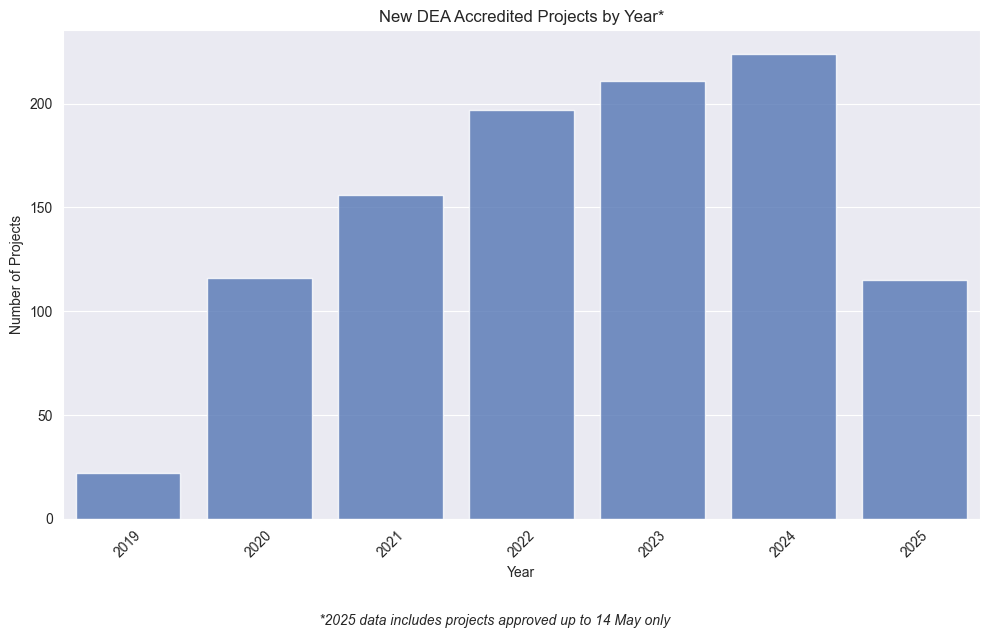

In [413]:
# Number of DEA accredited projects by year
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))

year_order = sorted(df['Accreditation Date Year'].dropna().unique())

sns.countplot(
    data=df,
    x='Accreditation Date Year',
    order=year_order,
    color='#4472C4',
    alpha=0.8,
    edgecolor='white'
)

plt.title('New DEA Accredited Projects by Year*')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)

plt.figtext(0.5, -0.05, '*2025 data includes projects approved up to 14 May only',
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

### Figure 2: Top 25 datasets accessed under the DEA between end 2019 - mid May 2025
| Rank | Dataset                                                         | # Count |
|------|------------------------------------------------------------------|--------:|
| 1    | Business Structure Database                                      |     220 |
| 2    | Annual Business Survey                                           |     191 |
| 3    | Annual Survey of Hours and Earnings                              |     158 |
| 4    | Labour Force Survey                                              |     151 |
| 5    | Annual Population Survey                                         |     132 |
| 6    | Annual Respondents Database                                      |      98 |
| 7    | Longitudinal Education Outcomes                                  |      82 |
| 8    | UK Innovation Survey                                             |      67 |
| 9    | Business Enterprise Research and Development                     |      54 |
| 10   | Understanding Society                                            |      54 |
| 11   | Labour Force Survey Longitudinal                                 |      37 |
| 12   | Business Register Employment Survey                              |      33 |
| 13   | Crime Survey for England and Wales                               |      31 |
| 14   | International Trade in Services                                  |      29 |
| 15   | Labour Force Survey Household                                    |      29 |
| 16   | Annual Survey of Hours and Earnings Longitudinal                 |      29 |
| 17   | Longitudinal Small Business Survey                               |      28 |
| 18   | ONS Longitudinal Study                                           |      27 |
| 19   | Living Costs and Food Survey                                     |      27 |
| 20   | Education and Child Health Insights from Linked Data             |      25 |
| 21   | Growing Up in England                                            |      23 |
| 22   | Wealth and Assets Survey                                         |      21 |
| 23   | Data First: Crown Court Dataset                                  |      20 |
| 24   | Longitudinal Study of England and Wales                          |      19 |
| 25   | Business Insights and Conditions Survey                          |      19 |

In [414]:
# All projects accessed a total number of datasets over 2800
all_datasets_df['count'].sum()

np.int64(2757)

In [415]:
def map_collection(dataset):
    """
    Map a single dataset name to its respective collection.
    """
    if pd.isna(dataset):
        return np.nan

    collection_mapping = {
        'agricultural research collection': 'Agricultural Research Collection',
        'annual survey of hours and earnings linked to census 2011': 'Wage and Employment Dynamics',
        'annual survey of hours and earnings longitudinal': 'Wage and Employment Dynamics',
        'annual survey of hours and earnings linked to paye and self-assessment data': 'Wage and Employment Dynamics',
        'data first: cross-justice system linking dataset': 'Data First',
        'data first: family court linked to cafcass and census 2021': 'Data First',
        'moj and dfe linked dataset': 'Data First',
        'data first: magistrates court dataset': 'Data First',
        'data first: crown court dataset': 'Data First',
        'data first: family court dataset': 'Data First',
        'data first: civil court data': 'Data First',
        'data first: prisoner dataset': 'Data First',
        'data first: probation dataset': 'Data First',
        'education and child health insights from linked data': 'ECHILD',
        'grading and admissions data england': 'GRADE',
        'growing up in england': 'Growing up in England',
        'longitudinal education outcomes': 'LEO'
    }

    return collection_mapping.get(dataset, np.nan)
        
df_exploded['collection'] = df_exploded['dataset_list_clean'].map(map_collection)

In [416]:
df_exploded[df_exploded['dataset_list_clean'] == 'education and child health insights from linked data']

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list,dataset_list_clean,collection
965,2024/163,Exploring the Impact of Clinical Diagnosis on ...,"Elizabeth Camacho, The University of Liverpool...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2024-08-27,2024Q3,2024,2024-07-01,Q3 2024,nhs; dfe: education and child health insights ...,education and child health insights from linke...,education and child health insights from linke...,ECHILD
972,2024/197,Evaluating the effects of the growing and unev...,"David Frayman, The London School of Economics\...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2024-10-16,2024Q4,2024,2024-10-01,Q4 2024,nhs; dfe: education and child health insights ...,education and child health insights from linke...,education and child health insights from linke...,ECHILD
984,2024/188,Pathways through support services in neurodive...,"Simona Skripkauskaite, University of Oxford",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2024-10-02,2024Q4,2024,2024-10-01,Q4 2024,nhs; dfe: education and child health insights ...,education and child health insights from linke...,education and child health insights from linke...,ECHILD
985,2024/187,Educational Outcomes after Paediatric Brain In...,"Hope Kent, University of Exeter\nHuw Wiliams, ...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2024-10-01,2024Q4,2024,2024-10-01,Q4 2024,nhs; dfe: education and child health insights ...,education and child health insights from linke...,education and child health insights from linke...,ECHILD
997,2024/210,"MATCHED (Maternal mental health, Child Health ...","Stuart Jarvis, University of York",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2024-10-30,2024Q4,2024,2024-10-01,Q4 2024,nhs; dfe: education and child health insights ...,education and child health insights from linke...,education and child health insights from linke...,ECHILD
1009,2024/243,Ethnic and migration variation and impact of a...,"Alua Yeskendir, University College London\nKat...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2024-12-06,2024Q4,2024,2024-10-01,Q4 2024,nhs; dfe: education and child health insights ...,education and child health insights from linke...,education and child health insights from linke...,ECHILD
1015,2025/017,"Out of Sight: Exclusions, Alternative Provisio...","Kalyan Kumar Kameshwara, University of Notting...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2025-01-28,2025Q1,2025,2025-01-01,Q1 2025,nhs; dfe: education and child health insights ...,education and child health insights from linke...,education and child health insights from linke...,ECHILD
1024,2024/237,The Burden of Child Sexual Exploitation and Ab...,"Patricio Troncoso, The University of Edinburgh...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2024-12-05,2024Q4,2024,2024-10-01,Q4 2024,nhs; dfe: education and child health insights ...,education and child health insights from linke...,education and child health insights from linke...,ECHILD
1031,2024/216,Psychosocial disadvantage in pregnancy: risk o...,"Rema Ramakrishnan, University of Oxford\nNicol...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2024-11-08,2024Q4,2024,2024

In [417]:
df_exploded.isna().sum()

Project ID                       0
Title                            0
Researchers                      2
Legal Basis                      0
Datasets Used                    0
Secure Research Service          0
Accreditation Date               0
Accreditation Date Quarter       0
Accreditation Date Year          0
quarter_date                     0
Quarter Label                    0
datasets_clean                   0
dataset_list                     0
dataset_list_clean               0
collection                    2530
dtype: int64

In [418]:
# ADR UK flagship datasets
flagship_datasets = ['agricultural research collection', 
                     'annual survey of hours and earnings linked to census 2011',
                     'annual survey of hours and earnings longitudinal',
                     'annual survey of hours and earnings linked to paye and self-assessment data',
                     'data first: cross-justice system linking dataset',
                     'data first: family court linked to cafcass and census 2021',
                     'education and child health insights from linked data',
                     'grading and admissions data england',
                     'growing up in england',
                     'longitudinal education outcomes',
                     'moj and dfe linked dataset', # note that this data is not accessed under the DEA so isn't in this dataset
                     'nursing and midwifery council register linked to census 2021',
                     'data first: magistrates court dataset', 
                     'data first: crown court dataset', 
                     'data first: family court dataset', 
                     'data first: civil court data', 
                     'data first: prisoner dataset',
                     'data first: probation dataset']

In [419]:
data_flagship = df_exploded[df_exploded['dataset_list_clean'].isin(flagship_datasets)]
data_flagship[data_flagship['dataset_list_clean'] == 'agricultural research collection']

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list,dataset_list_clean,collection
425,2022/129,AD|ARC : Linking Individual and Farm Level Dat...,"Nicholas Webster, Welsh Government\nMatthew Ke...",Digital Economy Act 2017,Office for National Statistics: Agricultural R...,Office for National Statistics Secure Research...,2022-09-11,2022Q3,2022,2022-07-01,Q3 2022,office for national statistics: agricultural r...,agricultural research collection,agricultural research collection,Agricultural Research Collection
575,2023/076,AD|ARC (Administrative Data Agri-Research Coll...,"Nicholas Webster, Welsh Government\nSian Morri...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2023-05-24,2023Q2,2023,2023-04-01,Q2 2023,"department for environment, food & rural affai...",bespoke admin data: agricultural research coll...,agricultural research collection,Agricultural Research Collection
1017,2024/224,"Sustaining their family, community and nation....","Sian Morrison-Rees, Swansea University\nPaul C...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2024-11-15,2024Q4,2024,2024-10-01,Q4 2024,"department for environment, food & rural affai...",administrative data | agriculture research col...,agricultural research collection,Agricultural Research Collection
1050,2024/236,"Farm household Resilience, Income Source and E...","Sian Morrison-Rees, Swansea University\nPaul W...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2024-12-03,2024Q4,2024,2024-10-01,Q4 2024,"department for environment, food & rural affai...",administrative data | agriculture research col...,agricultural research collection,Agricultural Research Collection


In [420]:
data_flagship.groupby('dataset_list_clean').size().reset_index(name='count').sort_index(ascending=False)

,dataset_list_clean,count
13,longitudinal education outcomes,82
12,growing up in england,23
11,grading and admissions data england,10
10,education and child health insights from linke...,25
9,data first: probation dataset,6
8,data first: prisoner dataset,8
7,data first: magistrates court dataset,6
6,data first: family court dataset,3
5,data first: crown court dataset,20
4,data first: cross-justice system linking dataset,6


In [421]:
df_exploded[df_exploded['dataset_list'].str.contains('agricultural research collection', case=False, na=False)]

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list,dataset_list_clean,collection
425,2022/129,AD|ARC : Linking Individual and Farm Level Dat...,"Nicholas Webster, Welsh Government\nMatthew Ke...",Digital Economy Act 2017,Office for National Statistics: Agricultural R...,Office for National Statistics Secure Research...,2022-09-11,2022Q3,2022,2022-07-01,Q3 2022,office for national statistics: agricultural r...,agricultural research collection,agricultural research collection,Agricultural Research Collection
575,2023/076,AD|ARC (Administrative Data Agri-Research Coll...,"Nicholas Webster, Welsh Government\nSian Morri...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2023-05-24,2023Q2,2023,2023-04-01,Q2 2023,"department for environment, food & rural affai...",bespoke admin data: agricultural research coll...,agricultural research collection,Agricultural Research Collection


In [422]:
flagship_projects = df[df['Project ID'].isin(data_flagship['Project ID'].unique())]
flagship_projects

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list
157,2021/035,"Shaping, testing and demonstrating the value o...","Polina Obolenskaya,\nLondon School of Economic...",Digital Economy Act 2017,Office for National Statistics: Growing Up in ...,Office for National Statistics Secure Research...,2021-11-05,2021Q4,2021,2021-10-01,Q4 2021,office for national statistics: growing up in ...,[growing up in england wave 1]
159,2021/038,Using linked Magistrates and Crown Court data ...,"Rebecca Pattinson, University of Lancaster",Digital Economy Act 2017,Ministry of Justice: MoJ Data First Crown cour...,Office for National Statistics Secure Research...,2021-04-21,2021Q2,2021,2021-04-01,Q2 2021,ministry of justice: moj data first crown cour...,[moj data first crown court defendant case lev...
160,2021/039,A ticking social timebomb?' An investigation i...,"Angela Sorsby, University of Sheffield",Digital Economy Act 2017,Ministry of Justice: MoJ Data First Crown cour...,Office for National Statistics Secure Research...,2021-11-05,2021Q4,2021,2021-10-01,Q4 2021,ministry of justice: moj data first crown cour...,[moj data first crown court defendant case lev...
161,2021/040,"Understanding the nature, extent and outcomes ...","Tim McSweeney, University of Hertfordshire",Digital Economy Act 2017,Ministry of Justice: MoJ Data First Crown cour...,Office for National Statistics Secure Research...,2021-04-16,2021Q2,2021,2021-04-01,Q2 2021,ministry of justice: moj data first crown cour...,[moj data first crown court defendant case lev...
162,2021/041,Ethnic inequalities in the Criminal Justice Sy...,"Kitty Lymperopoulou, Manchester Metropolitan U...",Digital Economy Act 2017,Ministry of Justice: MoJ Data First Crown cour...,Office for National Statistics Secure Research...,2021-04-21,2021Q2,2021,2021-04-01,Q2 2021,ministry of justice: moj data first crown cour...,[moj data first crown court defendant case lev...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2025/039,Decoding the Signals from Classrooms: Early Wa...,"Huamao Wang, University of Nottingham",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2025-02-12,2025Q1,2025,2025-01-01,Q1 2025,nhs; dfe: education and child health insights ...,"[nhs, education and child health insights from..."
1142,2025/042,Understanding Household and Parental Predictor...,"Yu Cui, University of Reading\nHolly Joseph, U...",Digital Economy Act 2017,Office for National Statistics & Department fo...,Office for National Statistics Secure Research...,2025-02-19,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics & department fo...,"[growing up in england wave 1, growing up in e..."
1143,2025/056,The Heterogeneous Impact of Urban Renewal Prog...,"Edoardo Badii, University of Warwick\nPaul Dav...",Digital Economy Act 2017,Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,2025-02-26,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual respond...,"[annual respondents, database x ­ uk, annual s..."
1145,2025/074,Examining Associations between Disability with...,"Lijie Zeng, University of Edinburgh\nJasmin We...",Digital Economy Act 2017,Office for National Statistics & Department fo...,Office for National Statistics Secure Research...,2025-03-12,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics & department fo...,"[growing up in england wave 1, growing up in e..."


## Analysis of ADR UK flagship dataset demand

- Since Q1 2021 to end of Q1 2025, there have been 173 projects requesting access to a total of 218 ADR UK flagship datasets

In [423]:
# Truncate data up to (end of) Q1 2025, as we don't have all the data for Q2 2025 yet
# Define the cutoff: start of Q2 2025 = 1 April 2025
cutoff = pd.to_datetime("2025-04-01")

# Filter data_flagship to keep only rows before Q2 2025
data_flagship = data_flagship[data_flagship['Accreditation Date'] < cutoff]

### Figure 3: Growth in overall ADR England flagship data requests 


C:\Users\balin\AppData\Local\Temp\ipykernel_21408\3820372355.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(new_labels)


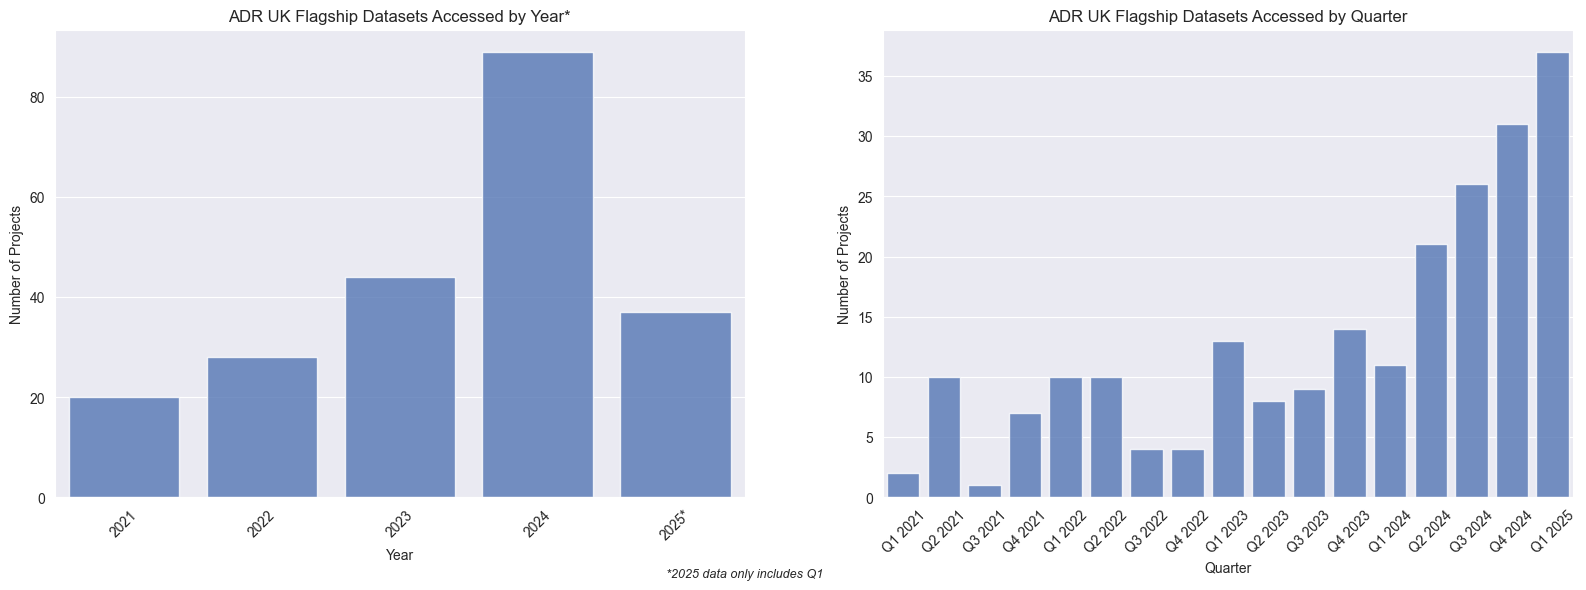

In [424]:
# Prepare data for both plots
year_order = sorted(data_flagship['Accreditation Date Year'].dropna().unique())

# Create quarter labels and ordering
quarter_periods = data_flagship['Accreditation Date Quarter'].dropna().unique()
quarter_periods_sorted = sorted(quarter_periods)
quarter_labels_ordered = [f"Q{q.quarter} {q.year}" for q in quarter_periods_sorted]
data_flagship['Quarter Label Clean'] = (
    'Q' + data_flagship['Accreditation Date Quarter'].dt.quarter.astype(str) + 
    ' ' + data_flagship['Accreditation Date Quarter'].dt.year.astype(str)
)

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Annual plot
sns.countplot(
    data=data_flagship,
    x='Accreditation Date Year',
    order=year_order,
    color='#4472C4',
    alpha=0.8,
    edgecolor='white',
    ax=ax1
)
ax1.set_title('ADR UK Flagship Datasets Accessed by Year*')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Projects')
ax1.tick_params(axis='x', rotation=45)

# Add asterisk to 2025 bar and note
x_labels = ax1.get_xticklabels()
new_labels = []
for label in x_labels:
    if label.get_text() == '2025':
        new_labels.append('2025*')
    else:
        new_labels.append(label.get_text())
ax1.set_xticklabels(new_labels)

# Find the position of 2025 on the x-axis and place footnote near it
year_positions = {year: i for i, year in enumerate(year_order)}
if 2025 in year_positions:
    pos_2025 = year_positions[2025]
    # Convert to axis coordinates (0-1 range)
    x_pos = pos_2025 / (len(year_order) - 1) if len(year_order) > 1 else 0.5
    ax1.text(x_pos, -0.15, '*2025 data only includes Q1', transform=ax1.transAxes, 
             fontsize=9, style='italic', ha='center', verticalalignment='top')

# Quarterly plot
sns.countplot(
    data=data_flagship,
    x='Quarter Label Clean',
    order=quarter_labels_ordered,
    color='#4472C4',
    alpha=0.8,
    edgecolor='white',
    ax=ax2
)
ax2.set_title('ADR UK Flagship Datasets Accessed by Quarter')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Number of Projects')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [425]:
# Some quarters have zero counts, so we need to create a full quarterly index
# Create full quarterly index from min to max quarter
full_quarters = pd.period_range(
    start=data_flagship['Accreditation Date Quarter'].min(),
    end=data_flagship['Accreditation Date Quarter'].max(),
    freq='Q'
)

# Create full multi-index with all collections
collections = data_flagship['collection'].dropna().unique()
full_index = pd.MultiIndex.from_product([full_quarters, collections], names=['Accreditation Date Quarter', 'collection'])

# Reindex to fill missing quarters with zero
collection_quarter_counts = (
    data_flagship
    .groupby(['Accreditation Date Quarter', 'collection'])
    .size()
    .reindex(full_index, fill_value=0)
    .reset_index(name='count')
)

# Add quarter_date and labels again
collection_quarter_counts['quarter_date'] = collection_quarter_counts['Accreditation Date Quarter'].dt.to_timestamp(how = 'start')
collection_quarter_counts['Quarter Label'] = collection_quarter_counts['Accreditation Date Quarter'].apply(
    lambda p: f"Q{p.quarter} {p.year}"
)

# Create pivot table from collection_quarter_counts
count_pivot = collection_quarter_counts.pivot_table(
    index='Quarter Label',
    columns='collection',
    values='count',
    aggfunc='sum'
)
count_pivot['Total'] = count_pivot.sum(axis=1)

# Basic summary row
summary_df = pd.DataFrame({
    'Total': [count_pivot['Total'].sum()],
}, index=['Total'])

# Combine
count_table = pd.concat([count_pivot, summary_df])

In [426]:
# Extract quarterly totals from the count_table
# Filter out summary rows and get only quarterly data
summary_stats_to_exclude = ['Total', 'Mean', 'Median', 'Std_Dev', 'CV', 'Quarterly_Growth_Rate', 'Active_Quarters']
quarterly_rows = count_table[~count_table.index.isin(summary_stats_to_exclude)]
quarterly_totals = quarterly_rows['Total']

# Create a clean dataframe for analysis
quarters_df = pd.DataFrame({
    'Quarter': quarterly_totals.index,
    'Projects': quarterly_totals.values
})

# Convert quarter labels to datetime for proper analysis
def quarter_to_date(quarter_str):
    """Convert 'Q1 2021' format to datetime"""
    parts = quarter_str.split()
    quarter = int(parts[0][1:])  # Remove 'Q' and convert
    year = int(parts[1])
    month = (quarter - 1) * 3 + 1  # Q1=1, Q2=4, Q3=7, Q4=10
    return pd.Timestamp(year, month, 1)

quarters_df['Date'] = quarters_df['Quarter'].apply(quarter_to_date)
quarters_df = quarters_df.sort_values('Date').reset_index(drop=True)
quarters_df['Year'] = quarters_df['Date'].dt.year

# Group by year and calculate annual totals (only for complete years)
annual_data = quarters_df.groupby('Year').agg({
    'Projects': ['sum', 'mean', 'std', 'count']
}).round(1)

annual_data.columns = ['Annual_Total', 'Quarterly_Mean', 'Quarterly_Std', 'Quarters_Count']

# Only include years with 4 complete quarters
complete_years = annual_data[annual_data['Quarters_Count'] == 4].copy()

# Calculate additional metrics
complete_years['CV'] = (complete_years['Quarterly_Std'] / complete_years['Quarterly_Mean']).round(3)
complete_years['YoY_Growth'] = complete_years['Annual_Total'].pct_change() * 100

print("# ADR UK Flagship Collections - Annual Performance Analysis")
print()
print(f"**Analysis Period:** {quarters_df['Quarter'].iloc[0]} to {quarters_df['Quarter'].iloc[-1]}")
print(f"**Total Quarters:** {len(quarters_df)}")
print()

# ========================================
# MARKDOWN TABLE 1: ANNUAL PERFORMANCE
# ========================================
print("## Annual Performance Summary")
print()
print("| Year | Annual Total | Avg per Quarter | Quarterly Std Dev | CV | YoY Growth |")
print("|------|--------------|-----------------|-------------------|----|-----------:|")

for year, row in complete_years.iterrows():
    annual_total = int(row['Annual_Total'])
    quarterly_mean = f"{row['Quarterly_Mean']:.1f}"
    quarterly_std = f"{row['Quarterly_Std']:.1f}"
    cv = f"{row['CV']:.3f}"
    
    # Handle YoY growth (first year will be NaN)
    if pd.isna(row['YoY_Growth']):
        yoy_growth = "—"
    else:
        yoy_growth = f"{row['YoY_Growth']:+.1f}%"
    
    print(f"| {year} | {annual_total} | {quarterly_mean} | {quarterly_std} | {cv} | {yoy_growth} |")

print()

# ========================================
# MARKDOWN TABLE 2: QUARTERLY BREAKDOWN
# ========================================
print("## Quarterly Breakdown")
print()

# Create quarterly pivot table
quarterly_pivot = quarters_df.pivot_table(
    index='Year', 
    columns=quarters_df['Quarter'].str.split().str[0],  # Extract Q1, Q2, etc.
    values='Projects', 
    aggfunc='first'
).fillna('—')

# Reorder columns to Q1, Q2, Q3, Q4
quarter_cols = ['Q1', 'Q2', 'Q3', 'Q4']
available_cols = [col for col in quarter_cols if col in quarterly_pivot.columns]
quarterly_pivot = quarterly_pivot[available_cols]

# Add annual total column
quarterly_pivot['Annual Total'] = quarterly_pivot.replace('—', 0).sum(axis=1)
quarterly_pivot = quarterly_pivot.replace(0, '—')  # Convert back zeros to dashes for display

print("| Year | Q1 | Q2 | Q3 | Q4 | Annual Total |")
print("|------|----|----|----|----|-------------:|")

for year, row in quarterly_pivot.iterrows():
    if year in complete_years.index:  # Only show complete years
        q_values = []
        for col in available_cols:
            val = row[col]
            q_values.append(str(int(val)) if val != '—' else '—')
        
        annual_val = int(complete_years.loc[year, 'Annual_Total'])
        q_str = " | ".join(q_values)
        print(f"| {year} | {q_str} | {annual_val} |")

print()

# ========================================
# KEY METRICS SUMMARY
# ========================================
if len(complete_years) > 1:
    print("## Key Growth Metrics")
    print()
    
    # Calculate CAGR
    first_year_total = complete_years.iloc[0]['Annual_Total']
    last_year_total = complete_years.iloc[-1]['Annual_Total']
    years_span = len(complete_years) - 1
    
    if years_span > 0 and first_year_total > 0:
        cagr = (((last_year_total / first_year_total) ** (1/years_span)) - 1) * 100
    
    # Summary stats
    total_growth = ((last_year_total / first_year_total) - 1) * 100
    avg_annual_projects = complete_years['Annual_Total'].mean()
    most_stable_year = complete_years.loc[complete_years['CV'].idxmin()].name
    most_volatile_year = complete_years.loc[complete_years['CV'].idxmax()].name
    
    print("| Metric | Value |")
    print("|--------|------:|")
    print(f"| **CAGR ({complete_years.index[0]}-{complete_years.index[-1]})** | **{cagr:.1f}%** |")
    print(f"| Total Growth | {total_growth:.1f}% |")
    print(f"| Average Annual Projects | {avg_annual_projects:.0f} |")
    print(f"| Most Stable Year (lowest CV) | {most_stable_year} |")
    print(f"| Most Volatile Year (highest CV) | {most_volatile_year} |")
    
    print()
    print("**Notes:**")
    print("- CV = Coefficient of Variation (volatility measure)")
    print("- Lower CV indicates more consistent quarterly performance")
    print("- YoY = Year-over-Year growth rate")

 

# ADR UK Flagship Collections - Annual Performance Analysis

**Analysis Period:** Q1 2021 to Q1 2025
**Total Quarters:** 17

## Annual Performance Summary

| Year | Annual Total | Avg per Quarter | Quarterly Std Dev | CV | YoY Growth |
|------|--------------|-----------------|-------------------|----|-----------:|
| 2021 | 20 | 5.0 | 4.2 | 0.840 | — |
| 2022 | 28 | 7.0 | 3.5 | 0.500 | +40.0% |
| 2023 | 44 | 11.0 | 2.9 | 0.264 | +57.1% |
| 2024 | 89 | 22.2 | 8.5 | 0.383 | +102.3% |

## Quarterly Breakdown

| Year | Q1 | Q2 | Q3 | Q4 | Annual Total |
|------|----|----|----|----|-------------:|
| 2021 | 2 | 10 | 1 | 7 | 20 |
| 2022 | 10 | 10 | 4 | 4 | 28 |
| 2023 | 13 | 8 | 9 | 14 | 44 |
| 2024 | 11 | 21 | 26 | 31 | 89 |

## Key Growth Metrics

| Metric | Value |
|--------|------:|
| **CAGR (2021-2024)** | **64.5%** |
| Total Growth | 345.0% |
| Average Annual Projects | 45 |
| Most Stable Year (lowest CV) | 2023 |
| Most Volatile Year (highest CV) | 2021 |

**Notes:**
- CV = Coefficient 

C:\Users\balin\AppData\Local\Temp\ipykernel_21408\322116584.py:90: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  quarterly_pivot['Annual Total'] = quarterly_pivot.replace('—', 0).sum(axis=1)


### Figure 4: Tables showing growth in overeall demand for ADR England flagship datasets

#### Annual Performance Summary

| Year | Annual Total | Avg per Quarter | Quarterly Std Dev | CV | Year-over-Year Growth |
|------|--------------|-----------------|-------------------|----|-----------:|
| 2021 | 20 | 5.0 | 4.2 | 0.840 | — |
| 2022 | 28 | 7.0 | 3.5 | 0.500 | +40.0% |
| 2023 | 44 | 11.0 | 2.9 | 0.264 | +57.1% |
| 2024 | 89 | 22.2 | 8.5 | 0.383 | +102.3% |

#### Quarterly Breakdown

| Year | Q1 | Q2 | Q3 | Q4 | Annual Total |
|------|----|----|----|----|-------------:|
| 2021 | 2 | 10 | 1 | 7 | 20 |
| 2022 | 10 | 10 | 4 | 4 | 28 |
| 2023 | 13 | 8 | 9 | 14 | 44 |
| 2024 | 11 | 21 | 26 | 31 | 89 |

#### Key Growth Metrics

| Metric | Value |
|--------|------:|
| **Compound Annual Growth Rate (2021-2024)** | **64.5%** |
| Total Growth | 345.0% |
| Average Annual Projects | 45 |

**Notes:**
- CV = Coefficient of Variation (volatility measure). Lower CV indicates more consistent quarterly performance

## Breakdowns by individual ADR UK flagship datatset collections

**Datasets included in WED collection**:
- Annual Survey of Hours and Earnings Longitudinal (I understand this was developed as part of WED)
- Annual Survey of Hours and Earnings Linked to Census 2011  
- Annual Survey of Hours and Earnings Linked to PAYE and Self-Assessment Data  

**Datasets included in Data First collection**:
- Data First: Crown Court Dataset  
- Data First: Cross-Justice System Linking Dataset  
- Data First: Prisoner Dataset  
- Data First: Probation Dataset  
- Data First: Family Court Dataset  
- Data First: Magistrates Court Dataset  
- Note: MoJ-DfE linkage is not included in this analysis

In [427]:
# Generate summary tables of the data for the ADR UK flagship collections
# Create the full quarterly range
full_quarters = pd.period_range(
    start=data_flagship['Accreditation Date Quarter'].min(),
    end=data_flagship['Accreditation Date Quarter'].max(),
    freq='Q'
)

# Get all collections
collections = data_flagship['collection'].dropna().unique()

# Create the complete combinations
full_combinations = []
for quarter in full_quarters:
    for collection in collections:
        full_combinations.append({
            'Accreditation Date Quarter': quarter,
            'collection': collection,
            'quarter_date': quarter.to_timestamp(how='start'),
            'Quarter Label': f"Q{quarter.quarter} {quarter.year}"
        })

# Create the base dataframe with all combinations
base_df = pd.DataFrame(full_combinations)

# Get actual counts from original data
actual_counts = (
    data_flagship
    .groupby(['Accreditation Date Quarter', 'collection'])
    .size()
    .reset_index(name='count')
)

# Merge with base dataframe, filling missing with 0
collection_quarter_counts_new = base_df.merge(
    actual_counts,
    on=['Accreditation Date Quarter', 'collection'],
    how='left'
)
collection_quarter_counts_new['count'] = collection_quarter_counts_new['count'].fillna(0).astype(int)

# Find first appearance of each collection
first_appearance = (
    collection_quarter_counts_new[collection_quarter_counts_new['count'] > 0]
    .groupby('collection')['quarter_date']
    .min()
    .reset_index()
    .rename(columns={'quarter_date': 'first_quarter'})
)

# Merge back
collection_quarter_counts_new = collection_quarter_counts_new.merge(
    first_appearance,
    on='collection',
    how='left'
)

# Apply the logic
def assign_values(row):
    if pd.isna(row['first_quarter']):
        return np.nan  # Collection never appeared
    elif row['quarter_date'] < row['first_quarter']:
        return np.nan  # Before first appearance
    else:
        return row['count']  # Use actual count (0 or positive)

collection_quarter_counts_new['adjusted_count'] = collection_quarter_counts_new.apply(assign_values, axis=1)

# Remove incomplete Q2 2025 data
collection_quarter_counts_new = collection_quarter_counts_new[
    ~((collection_quarter_counts_new['quarter_date'].dt.year == 2025) & 
      (collection_quarter_counts_new['quarter_date'].dt.quarter == 2))
]

# Create the pivot tables with proper chronological ordering
collection_quarter_counts_new = collection_quarter_counts_new.sort_values('quarter_date')

# Create count pivot using quarter_date as index, then map to Quarter Label
count_pivot = collection_quarter_counts_new.pivot_table(
    values='adjusted_count',
    index='quarter_date',
    columns='collection',
    aggfunc='first'
)

# Create a mapping from quarter_date to Quarter Label in chronological order
quarter_label_mapping = (
    collection_quarter_counts_new[['quarter_date', 'Quarter Label']]
    .drop_duplicates()
    .sort_values('quarter_date')
    .set_index('quarter_date')['Quarter Label']
)

# Map the index to Quarter Labels while preserving order
count_pivot.index = count_pivot.index.map(quarter_label_mapping)
count_pivot.index.name = 'Quarter Label'

# Add row totals column
count_pivot['Total'] = count_pivot.sum(axis=1, skipna=True)

# ========================================
# ENHANCED SUMMARY STATISTICS WITH GROWTH METRICS
# ========================================

# Calculate summary statistics as rows (not mixing columns and rows)
def calculate_summary_row(df, stat_name, func):
    """Calculate a summary statistic row across all collection columns"""
    summary_row = {}
    for col in df.columns:
        if col == 'Total':
            # For the Total column, sum all quarterly totals
            if stat_name == 'Total':
                summary_row[col] = df[col].sum()
            elif stat_name == 'Mean':
                summary_row[col] = df[col].mean()
            elif stat_name == 'Std_Dev':
                summary_row[col] = df[col].std()
            else:
                summary_row[col] = func(df[col].dropna()) if len(df[col].dropna()) > 0 else 0
        else:
            # For individual collections
            valid_data = df[col].dropna()
            if len(valid_data) == 0:
                summary_row[col] = 0
            else:
                if stat_name == 'Total':
                    summary_row[col] = valid_data.sum()
                elif stat_name == 'Mean':
                    summary_row[col] = valid_data.mean()
                elif stat_name == 'Std_Dev':
                    summary_row[col] = valid_data.std()
                elif stat_name == 'CV':
                    mean_val = valid_data.mean()
                    std_val = valid_data.std()
                    summary_row[col] = std_val / mean_val if mean_val > 0 else 0
                elif stat_name == 'Quarterly_Growth_Rate':
                    # Calculate average quarterly growth rate
                    if len(valid_data) > 1:
                        non_zero_data = valid_data[valid_data > 0]
                        if len(non_zero_data) > 1:
                            growth_rates = []
                            for i in range(1, len(non_zero_data)):
                                prev_val = non_zero_data.iloc[i-1]
                                curr_val = non_zero_data.iloc[i]
                                if prev_val > 0:
                                    growth_rate = ((curr_val / prev_val) - 1) * 100
                                    growth_rates.append(growth_rate)
                            summary_row[col] = np.mean(growth_rates) if growth_rates else 0
                        else:
                            summary_row[col] = 0
                    else:
                        summary_row[col] = 0
                elif stat_name == 'Active_Quarters':
                    summary_row[col] = len(valid_data)
                else:
                    summary_row[col] = func(valid_data)
    
    return pd.Series(summary_row, name=stat_name)

# Create summary statistics rows
summary_rows = []
summary_rows.append(calculate_summary_row(count_pivot, 'Total', lambda x: x.sum()))
summary_rows.append(calculate_summary_row(count_pivot, 'Mean', lambda x: x.mean()))
summary_rows.append(calculate_summary_row(count_pivot, 'Std_Dev', lambda x: x.std()))
summary_rows.append(calculate_summary_row(count_pivot, 'CV', lambda x: x.std()/x.mean() if x.mean() > 0 else 0))
summary_rows.append(calculate_summary_row(count_pivot, 'Quarterly_Growth_Rate', lambda x: 0))
summary_rows.append(calculate_summary_row(count_pivot, 'Active_Quarters', lambda x: len(x)))

# Create summary DataFrame
summary_df = pd.DataFrame(summary_rows)

# Round the summary statistics for display
summary_df = summary_df.round({
    col: 2 if col != 'Total' else 0 for col in summary_df.columns
})

# Apply consistent rounding: 2 decimal places for most metrics, whole numbers for growth rate
for metric in ['Mean', 'Std_Dev', 'CV']:
    if metric in summary_df.index:
        summary_df.loc[metric] = summary_df.loc[metric].round(2)

# Round Quarterly_Growth_Rate to whole numbers
if 'Quarterly_Growth_Rate' in summary_df.index:
    summary_df.loc['Quarterly_Growth_Rate'] = summary_df.loc['Quarterly_Growth_Rate'].round(0)

# Keep Active_Quarters as integers
if 'Active_Quarters' in summary_df.index:
    summary_df.loc['Active_Quarters'] = summary_df.loc['Active_Quarters'].round(0)

# Combine quarterly data with summary statistics
count_table = pd.concat([count_pivot, summary_df])

print("=== ADR UK FLAGSHIP COLLECTIONS - INDIVIDUAL DATASET ANALYSIS ===")
print(f"Analysis period: {count_pivot.index[0]} to {count_pivot.index[-1]}")
print(f"Total collections analyzed: {len(collections)}")
print()

# ========================================
# COLLECTION PERFORMANCE SUMMARY
# ========================================
print("COLLECTION PERFORMANCE SUMMARY")
print("=" * 60)
print(f"{'Collection':<25} {'Total':<6} {'Avg/Q':<6} {'CV':<6} {'QGR%':<6} {'Quarters':<8}")
print("-" * 60)

# Get summary statistics for individual collections (exclude 'Total' column)
collection_columns = [col for col in count_pivot.columns if col != 'Total']
collection_summary = summary_df[collection_columns].T
collection_summary = collection_summary.sort_values('Total', ascending=False)

for collection, row in collection_summary.iterrows():
    total = int(row['Total'])
    mean_val = f"{row['Mean']:.2f}"
    cv = f"{row['CV']:.2f}"
    qgr = f"{row['Quarterly_Growth_Rate']:+.0f}"
    quarters = int(row['Active_Quarters'])
    
    print(f"{collection:<25} {total:<6} {mean_val:<6} {cv:<6} {qgr:<6} {quarters:<8}")

print()
print("Legend:")
print("- Total: Total projects across all quarters")
print("- Avg/Q: Average projects per active quarter")
print("- CV: Coefficient of Variation (volatility measure)")
print("- QGR%: Average quarterly growth rate")
print("- Quarters: Number of active quarters")
print()

# ========================================
# TOP PERFORMERS ANALYSIS
# ========================================
print("TOP PERFORMERS ANALYSIS")
print("=" * 40)

# Top by volume
top_volume = collection_summary.nlargest(3, 'Total')
print("🏆 TOP 3 BY TOTAL VOLUME:")
for i, (collection, row) in enumerate(top_volume.iterrows(), 1):
    print(f"  {i}. {collection}: {int(row['Total'])} projects")

print()

# Top by average quarterly access requests
top_avg_quarterly = collection_summary.nlargest(3, 'Mean')
print("TOP 3 BY AVG QUARTERLY ACCESS REQUESTS:")
for i, (collection, row) in enumerate(top_avg_quarterly.iterrows(), 1):
    print(f"  {i}. {collection}: {row['Mean']:.2f} projects per quarter")

# Top by growth rate (minimum 2 active quarters)
eligible_for_growth = collection_summary[collection_summary['Active_Quarters'] >= 2]
if len(eligible_for_growth) > 0:
    top_growth = eligible_for_growth.nlargest(3, 'Quarterly_Growth_Rate')
    print("TOP 3 BY QUARTERLY GROWTH RATE:")
    for i, (collection, row) in enumerate(top_growth.iterrows(), 1):
        print(f"  {i}. {collection}: {row['Quarterly_Growth_Rate']:+.0f}% per quarter")

print()

# Most consistent (lowest CV, minimum 3 quarters and >0 total)
eligible_for_consistency = collection_summary[
    (collection_summary['Active_Quarters'] >= 3) & 
    (collection_summary['Total'] > 0)
]
if len(eligible_for_consistency) > 0:
    most_consistent = eligible_for_consistency.nsmallest(3, 'CV')
    print("🎯 TOP 3 MOST CONSISTENT (Lowest CV):")
    for i, (collection, row) in enumerate(most_consistent.iterrows(), 1):
        print(f"  {i}. {collection}: CV = {row['CV']:.2f}")

print()

# Summary insights
total_projects = int(summary_df.loc['Total', 'Total'])
active_collections = len(collection_summary[collection_summary['Total'] > 0])
avg_projects_per_collection = collection_summary['Total'].mean()

print("SUMMARY INSIGHTS:")
print(f"- {active_collections} collections have delivered projects")
print(f"- Average of {avg_projects_per_collection:.1f} projects per active collection")
print(f"- Combined total: {total_projects} projects across all collections")

# Display the full table
print()
print("DETAILED QUARTERLY DATA:")
print("=" * 40)
print(count_table)

=== ADR UK FLAGSHIP COLLECTIONS - INDIVIDUAL DATASET ANALYSIS ===
Analysis period: Q1 2021 to Q1 2025
Total collections analyzed: 7

COLLECTION PERFORMANCE SUMMARY
Collection                Total  Avg/Q  CV     QGR%   Quarters
------------------------------------------------------------
LEO                       80     5.00   0.97   +98    16      
Data First                49     3.06   1.13   +95    16      
Wage and Employment Dynamics 31     1.82   0.65   +33    17      
ECHILD                    23     7.67   0.76   +460   3       
Growing up in England     21     1.50   1.19   +38    14      
GRADE                     10     3.33   0.62   -48    3       
Agricultural Research Collection 4      0.36   1.85   +50    11      

Legend:
- Total: Total projects across all quarters
- Avg/Q: Average projects per active quarter
- CV: Coefficient of Variation (volatility measure)
- QGR%: Average quarterly growth rate
- Quarters: Number of active quarters

TOP PERFORMERS ANALYSIS
🏆 TOP 3 BY

### Figure 4: Summary results table for individual collections

| Collection                     | Total | Avg Requests per Active Quarter |   Coefficient of Variation  | Avg Quarterly Growth Rate (%)   | # Active Quarters |
|-------------------------------|--------|-------|-------|--------|----------|
| LEO                           | 80     | 5.0   | 0.97 | +98% | 16       |
| Data First                    | 49     | 3.1   | 1.13 | +95% | 16       |
| Wage and Employment Dynamics | 31     | 1.8   | 0.650 | +33% | 17       |
| ECHILD                        | 23     | 7.7   | 0.76 | +460%| 3        |
| Growing up in England         | 21     | 1.5   | 1.19 | +38% | 14       |
| GRADE                         | 10     | 3.3   | 0.62 | -48% | 3        |
| Agricultural Research Collection | 4  | 0.4   | 1.85 | +50% | 11       |

TOP 3 BY TOTAL VOLUME:
  1. LEO: 80 requests
  2. Data First: 49 requests
  3. Wage and Employment Dynamics: 31 requests

TOP 3 BY AVG QUARTERLY ACCESS REQUESTS:
  1. ECHILD: 7.67 projects per quarter
  2. LEO: 5.00 projects per quarter
  3. GRADE: 3.33 projects per quarter

TOP 3 BY QUARTERLY GROWTH RATE:
  1. ECHILD: +460.0% per quarter*
  2. LEO: +97.6% per quarter
  3. Data First: +94.9% per quarter

*The exceptionally high growth rate observed for ECHILD reflects its recent introduction, with access beginning only in the last three quarters - this short baseline inflates the calculated growth and should not be interpreted as a sustained long-term trend.


### Figure 5: Graphs showing total volume and average quarterly requests for each ADR England flagship dataset collection 

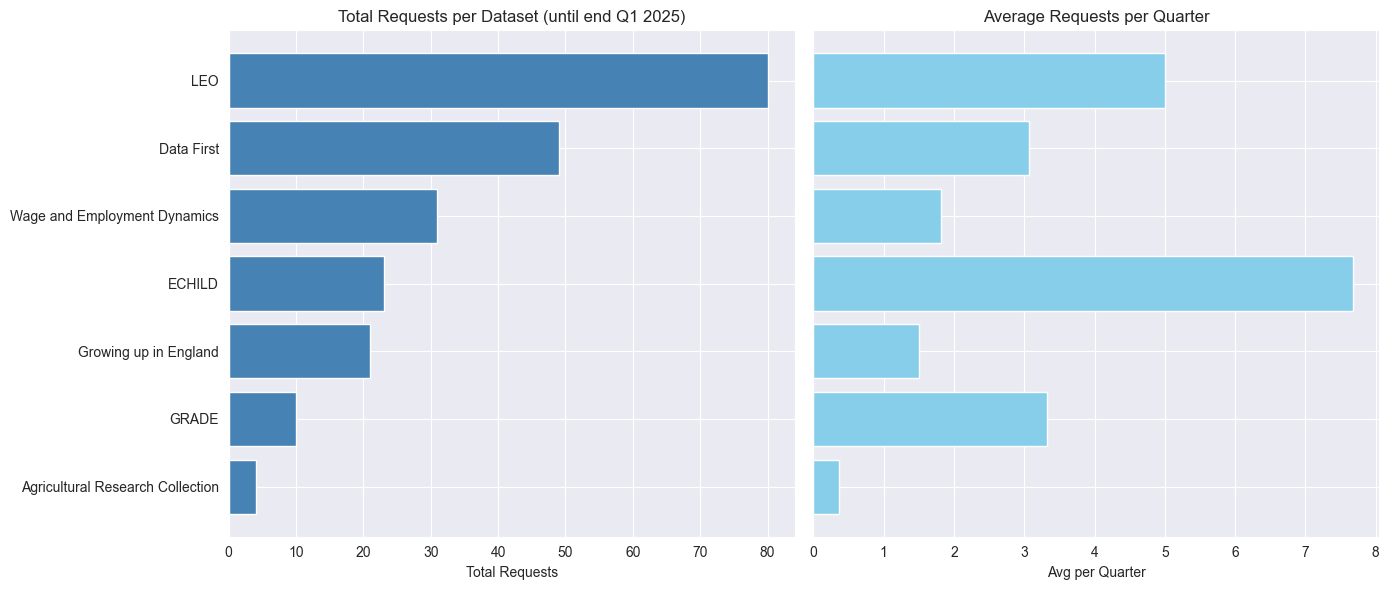

In [428]:
data = {
    "Dataset": [
        "Agricultural Research Collection", "Data First", "ECHILD", "GRADE",
        "Growing up in England", "LEO", "Wage and Employment Dynamics", "Total"
    ],
    "Quarters": [
        11, 16, 3, 3,
        14, 16, 17, 19
    ],
    "Total Requests": [
        4, 49, 23, 10,
        21, 80, 31, 218
    ],
    "Avg per Quarter": [
        round(4 / 11, 2),    # 0.36
        round(49 / 16, 2),   # 3.06
        round(23 / 3, 2),    # 7.67
        round(10 / 3, 2),    # 3.33
        round(21 / 14, 2),   # 1.5
        round(80 / 16, 2),   # 5.0
        round(31 / 17, 2),   # 1.82
        round(218 / 19, 2)   # 11.47
    ]
}


# Create DataFrame and exclude "Total"
df_ADR_counts = pd.DataFrame(data)
df_ADR_counts = df_ADR_counts[df_ADR_counts["Dataset"] != "Total"]

# Sort by total requests descending
df_ADR_counts_sorted = df_ADR_counts.sort_values("Total Requests", ascending=False)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Total Requests plot (inverted y-axis to show most popular at top)
axes[0].barh(df_ADR_counts_sorted["Dataset"], df_ADR_counts_sorted["Total Requests"], color='steelblue')
axes[0].set_title("Total Requests per Dataset (until end Q1 2025)")
axes[0].set_xlabel("Total Requests")
axes[0].invert_yaxis()

# Avg per Quarter plot (matching y-axis order)
axes[1].barh(df_ADR_counts_sorted["Dataset"], df_ADR_counts_sorted["Avg per Quarter"], color='skyblue')
axes[1].set_title("Average Requests per Quarter")
axes[1].set_xlabel("Avg per Quarter")

plt.tight_layout()
plt.show()

### Figure 6: Access requests for ADR England flagship datasets split by collection

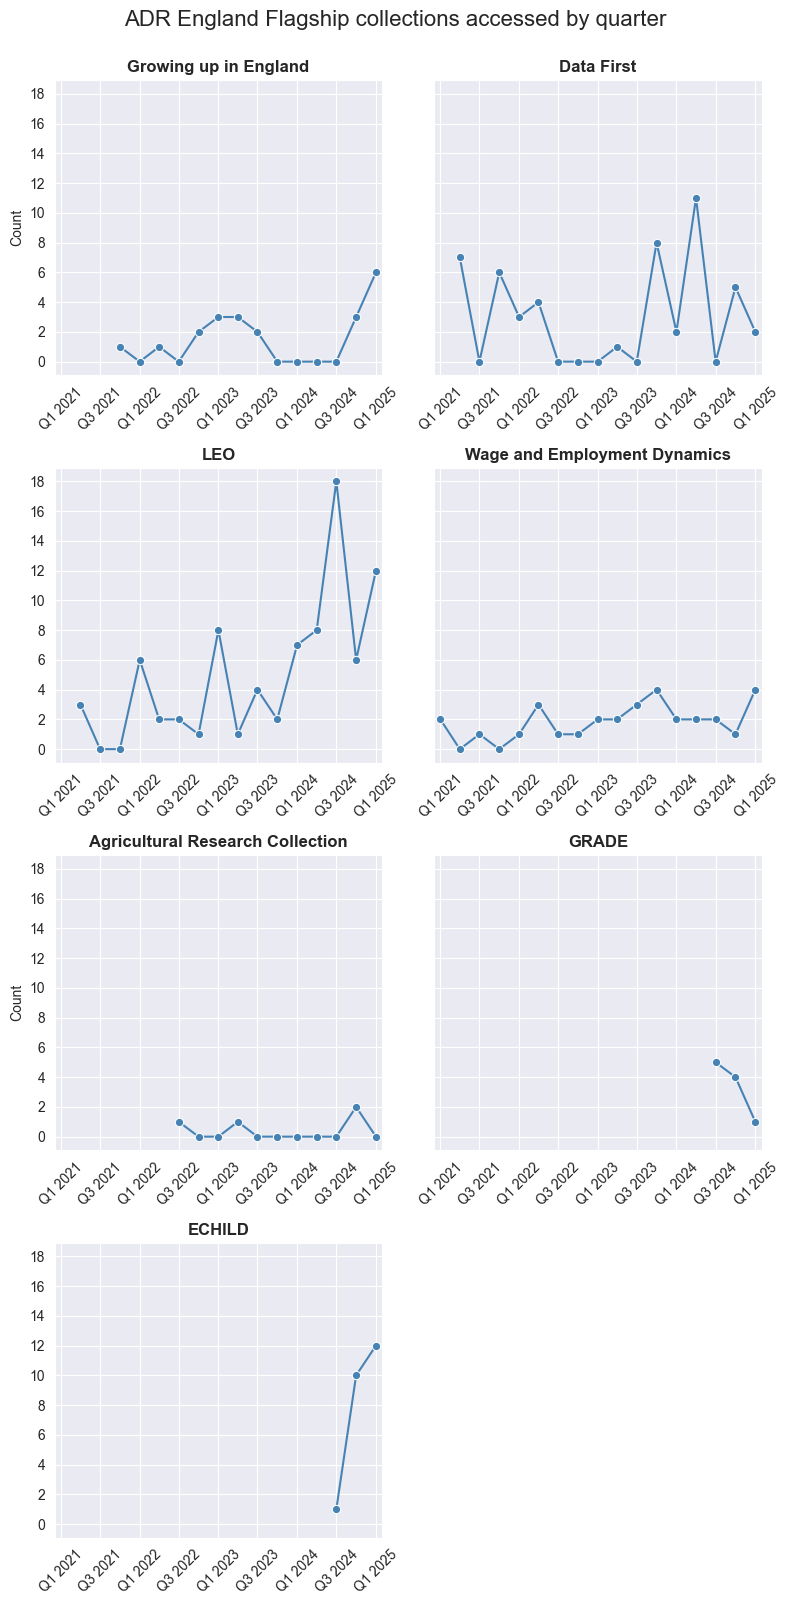

In [429]:
# Get unique collections and the full quarter range
collections = collection_quarter_counts['collection'].unique()
all_quarters = collection_quarter_counts['quarter_date'].unique()
all_quarter_labels = collection_quarter_counts.drop_duplicates('quarter_date')['Quarter Label'].tolist()
n_collections = len(collections)

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 16), sharey=True)
axes = axes.flatten()  # Make it easier to iterate

for i, collection in enumerate(collections):
    # Filter data for this collection
    collection_data = collection_quarter_counts[collection_quarter_counts['collection'] == collection].copy()
    
    # Find the first quarter where this collection had any activity (count > 0)
    first_active_quarter = collection_data[collection_data['count'] > 0]['quarter_date'].min()
    
    # If the collection has never been active, skip plotting
    if pd.isna(first_active_quarter):
        axes[i].set_title(f"{collection}\n(No activity)", fontsize=12, fontweight='bold', color='gray')
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('Count' if i % 4 == 0 else '')
        continue
    
    # Filter to only include data from the first active quarter onwards
    filtered_data = collection_data[collection_data['quarter_date'] >= first_active_quarter]
    
    # Plot on the specific subplot
    sns.lineplot(
        data=filtered_data,
        x='quarter_date',
        y='count',
        marker='o',
        ax=axes[i],
        color='steelblue'
    )
    
    # Format the subplot
    axes[i].set_title(collection, fontsize=12, fontweight='bold')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Count' if i % 4 == 0 else '')  # Only show y-label on leftmost plots
    axes[i].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Set ALL quarters on x-axis (same scale for all subplots)
    step = max(1, len(all_quarters) // 8)  # Show every nth quarter to avoid crowding
    axes[i].set_xticks(all_quarters[::step])
    axes[i].set_xticklabels(all_quarter_labels[::step], rotation=45)
    
    # Set x-axis limits to full range for consistency across all subplots
    time_range = all_quarters[-1] - all_quarters[0]
    padding = time_range * 0.02  # 2% padding on each side
    axes[i].set_xlim(all_quarters[0] - padding, all_quarters[-1] + padding)
    
    # Add small padding to y-axis as well
    axes[i].margins(y=0.05)  # 5% padding on y-axis

# Hide any unused subplots
for i in range(n_collections, len(axes)):
    axes[i].set_visible(False)

plt.suptitle('ADR England Flagship collections accessed by quarter', fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

# Part 2: How have research topics and priorities evolved over time?

## Analysis of all DEA approved projects

In [430]:
# Simple count of word frequencies across all project titles
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# stopwrods
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
custom_stopwords = stop_words.union({'uk', 'england', 'analysis', 'data', 'wales', 'northern', 'ireland', 'scotland', 'outcome', 'outcomes', 'effect', 'evaluation', 'impact',
                                     'understanding', 'research', 'study', 'project', 'use', 'used', 'useful', 'using', 'dataset', 'datasets', 'collection', 'effects'})

# Tokenize project titles
def tokenize(text):
    return re.sub(r'[^\w\s]', ' ', #remove punctuation/replace these with a space
                  text.lower()).split()

# Flatten all tokenized words from project titles
all_words = [word for title in df['Title'] for word in tokenize(title) if word not in custom_stopwords]

word_counts = Counter(all_words)

# Display top 20 word counts
print("Most common words in project titles:")
print(word_counts.most_common(20))

Most common words in project titles:
[('labour', 85), ('health', 75), ('market', 74), ('education', 68), ('social', 60), ('covid', 55), ('productivity', 53), ('19', 53), ('economic', 52), ('employment', 44), ('local', 41), ('business', 39), ('innovation', 39), ('level', 38), ('children', 38), ('firm', 36), ('inequalities', 36), ('mobility', 36), ('firms', 32), ('evidence', 31)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [431]:
# Cluster analysis
# pre-process the project titles
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    #remove stopwords
    text = ' '.join([word for word in text.split() if word not in custom_stopwords])
    return text
# Apply the preprocessing function to the project titles
df['processed_titles'] = df['Title'].apply(preprocess_text)

# Create a list of all project titles
project_titles = df['processed_titles'].tolist()

In [432]:
# Vectorise with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords))

# Fit the vectorizer on your processed titles and transform to TF-IDF matrix
X = vectorizer.fit_transform(project_titles)

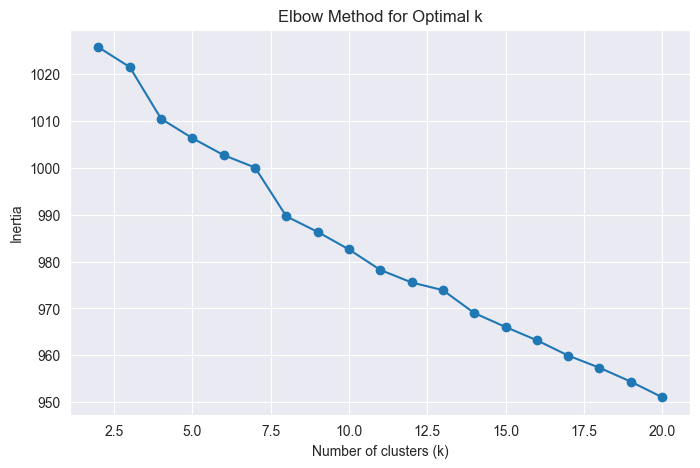

In [433]:
from sklearn.cluster import KMeans
# Try a range of cluster counts
inertia = []
K_range = range(2, 21)  # Try from 2 to 20 clusters

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)  # Inertia = sum of squared distances to nearest centroid

# Plot the inertia values to find the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [434]:
# Cluster with KMeans
from sklearn.cluster import KMeans

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42) # n_clusters as determined from elbow method
kmeans.fit(X)

labels = kmeans.labels_

# generarte dataframe with keywords and their cluster labels
clustered = pd.DataFrame({
    'title': project_titles,
    'cluster': labels
})

### Figure 7: Thematic clusters of DEA research project titles
This figure presents word clouds for four thematic clusters (Cluster 0, 1, and 2, 3) identified through KMeans clustering of TF-IDF vectorized project titles. Each cluster groups titles with similar keyword patterns. Word size reflects each term’s importance within the cluster, as measured by TF-IDF — capturing both frequency and uniqueness.

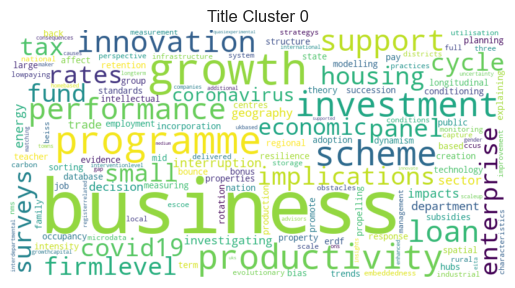

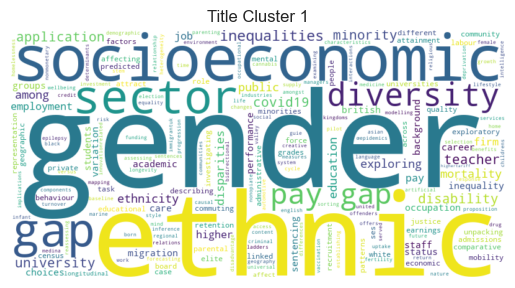

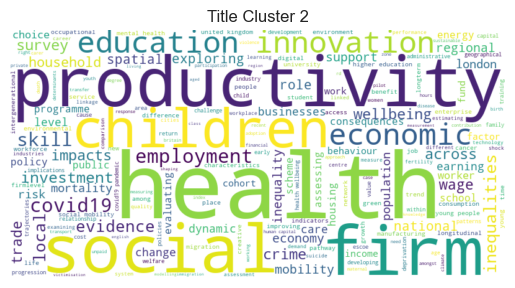

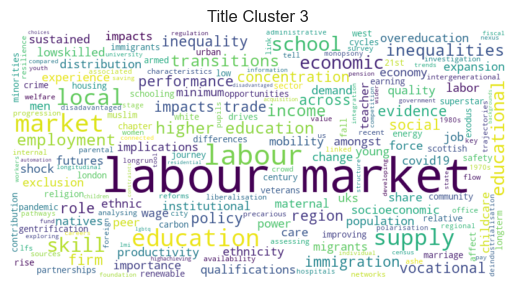

In [435]:
#visualise with wordcloud
from wordcloud import WordCloud

for i in range(n_clusters):
    text = ' '.join(clustered[clustered['cluster'] == i]['title'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Title Cluster {i}")
    plt.show()

- Distinctive research terms across all DEA accredited project titles over the past 6 years can be split very broadly into four clusters:
    - Cluster 1: project titles on business, growth, and productivity; 
    - Cluster 2: gender and ethnic inequalities and gaps, 
    - Cluster 3: includes terms on health, social and children;
    - Cluster 4: labour market, skills and education terms.

### Figure 8: individual term trends for top 10 terms by year
Graphs track annual TF-IDF scores for ten most prominent research terms: labour, market, education, health, productivity, social, employment, covid19, economic, business; in project titles from the public register between 2020 and 2024. TF-IDF (Term Frequency–Inverse Document Frequency) reflects how important a term is in a specific year relative to other years, highlighting changes in salience over time. An upward trend indicates growing distinctiveness or emphasis of a term in that year's projects, while a decline suggests decreasing thematic prominence. Each panel shows the term’s yearly score, helping identify evolving research interests within the DEA-accredited landscape

In [436]:
# Function to calculate TF-IDF scores for a set of documents
def top_tfidf_dict(docs, n=20):
    """Calculate top n TF-IDF terms for a collection of documents"""
    vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords))
    X = vectorizer.fit_transform(docs)
    scores = X.sum(axis=0).A1
    terms = vectorizer.get_feature_names_out()
    sorted_terms = sorted(zip(terms, scores), key=lambda x: x[1], reverse=True)
    return dict(sorted_terms[:n])

# Filter data - exclude 2019, include 2020-2024 (excluding 2025)
df_filtered = df[(df['Accreditation Date Year'] >= 2020) & (df['Accreditation Date Year'] < 2025)]

# Calculate documents per year
docs_per_year = df_filtered['Accreditation Date Year'].value_counts().to_dict()

# Print number of documents per year
print("\nDocuments per year (2020-2024):")
for year in sorted(docs_per_year.keys()):
    print(f"{year}: {docs_per_year[year]} projects")

# Calculate TF-IDF scores by year
tfidf_dict_by_year = {}
for year, group in df_filtered.groupby('Accreditation Date Year'):
    tfidf_dict_by_year[year] = top_tfidf_dict(group['processed_titles'])
    print(f"\nTop 10 terms for {year}:")
    top_terms = list(tfidf_dict_by_year[year].items())[:10]
    for term, score in top_terms:
        print(f"  {term}: {score:.3f}")

# Get all unique terms across all years
all_terms = set()
for year_dict in tfidf_dict_by_year.values():
    all_terms.update(year_dict.keys())

# Find top 10 terms by total TF-IDF score across all years
term_totals = {}
for term in all_terms:
    total = sum(year_dict.get(term, 0) for year_dict in tfidf_dict_by_year.values())
    term_totals[term] = total

top_10_terms = sorted(term_totals.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_term_names = [term for term, _ in top_10_terms]

print("\nTop 10 terms across all years (2020-2025):")
for term, total in top_10_terms:
    print(f"  {term}: {total:.3f}")

# Create DataFrame for plotting
years = sorted(tfidf_dict_by_year.keys())
data_for_plot = []
for term in top_10_term_names:
    for year in years:
        score = tfidf_dict_by_year[year].get(term, 0)
        data_for_plot.append({
            'Year': year,
            'Term': term,
            'TF-IDF Score': score
        })

plot_df = pd.DataFrame(data_for_plot)


Documents per year (2020-2024):
2020: 116 projects
2021: 156 projects
2022: 197 projects
2023: 211 projects
2024: 224 projects

Top 10 terms for 2020:
  covid19: 4.024
  business: 3.509
  firm: 3.166
  inequalities: 3.051
  local: 2.942
  social: 2.890
  labour: 2.860
  market: 2.655
  evidence: 2.509
  productivity: 2.470

Top 10 terms for 2021:
  covid19: 5.533
  social: 4.527
  productivity: 3.727
  labour: 3.326
  wellbeing: 3.309
  market: 2.925
  economic: 2.921
  employment: 2.773
  inequalities: 2.720
  gap: 2.634

Top 10 terms for 2022:
  education: 4.419
  business: 4.387
  productivity: 3.719
  labour: 3.511
  covid19: 3.388
  market: 3.268
  firms: 3.259
  local: 3.211
  trade: 3.199
  crime: 3.089

Top 10 terms for 2023:
  market: 6.504
  labour: 6.255
  productivity: 5.378
  innovation: 4.389
  education: 4.319
  health: 4.273
  social: 3.670
  economic: 3.638
  wellbeing: 3.611
  business: 3.174

Top 10 terms for 2024:
  labour: 6.209
  market: 6.123
  education: 5.777


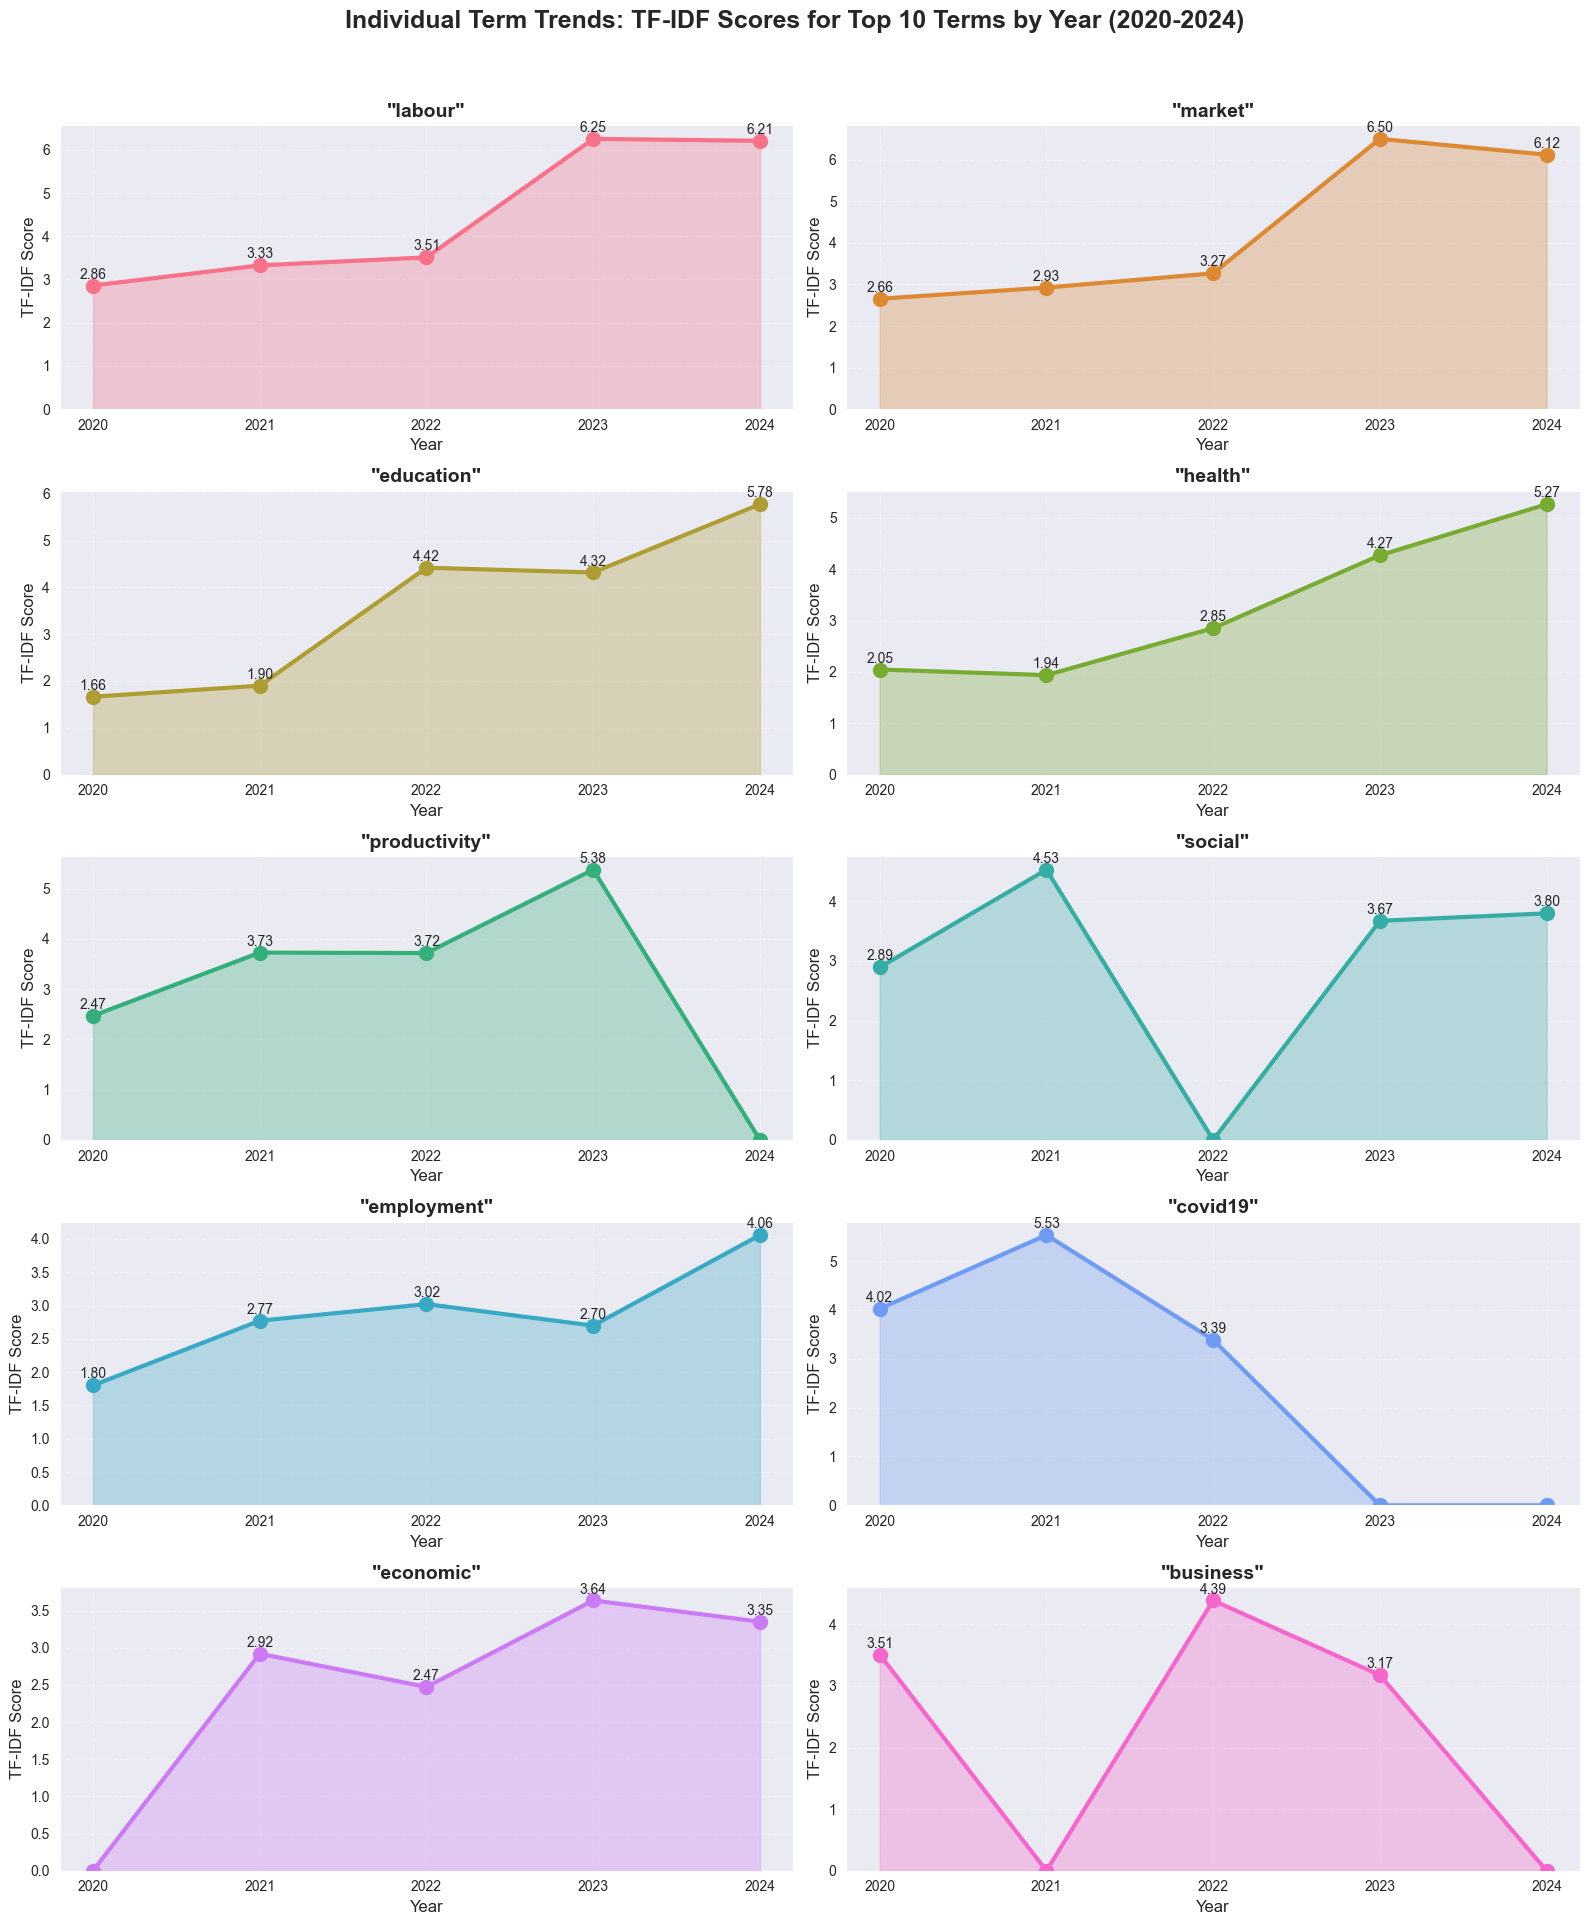

In [437]:
# Set up color palette
colors = sns.color_palette("husl", 10)

# Create individual subplots for each term
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()

for i, term in enumerate(top_10_term_names):
    ax = axes[i]
    term_data = plot_df[plot_df['Term'] == term]
    
    ax.plot(term_data['Year'], term_data['TF-IDF Score'], 
            marker='o', linewidth=3, markersize=10,
            color=colors[i])
    
    # Fill area under the line
    ax.fill_between(term_data['Year'], term_data['TF-IDF Score'], 
                    alpha=0.3, color=colors[i])
    
    # Add value labels
    for x, y in zip(term_data['Year'], term_data['TF-IDF Score']):
        if y > 0:
            ax.annotate(f'{y:.2f}', (x, y), 
                       textcoords="offset points", xytext=(0,5), 
                       ha='center', fontsize=10)
    
    ax.set_title(f'"{term}"', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('TF-IDF Score', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Set y-axis to start at 0
    ax.set_ylim(bottom=0)
    
    # Set x-axis to show all years
    ax.set_xticks(years)

# Add main title with extra padding
fig.suptitle('Individual Term Trends: TF-IDF Scores for Top 10 Terms by Year (2020-2024)', 
             fontsize=18, fontweight='bold', y=0.98)

# Adjust layout with extra top padding
plt.tight_layout(rect=[0, 0.02, 1, 0.96])
plt.show()



### Figure 9: Annual shifts in research emphasis (2020–2024): TF-IDF heatmap of top 10 terms in DEA project titles
This heatmap visualizes annual TF-IDF scores for the top 10 research terms found in project titles between 2020 and 2024. Each cell shows the TF-IDF score of a term in a given year, with warmer colors (orange to deep red) indicating higher relative importance of the term in that year’s corpus of titles. For example, covid19 peaked in importance in 2021 before disappearing in later years, while terms like education and labour grew more prominent over time. The color gradient helps highlight shifts in thematic focus across DEA-accredited research.

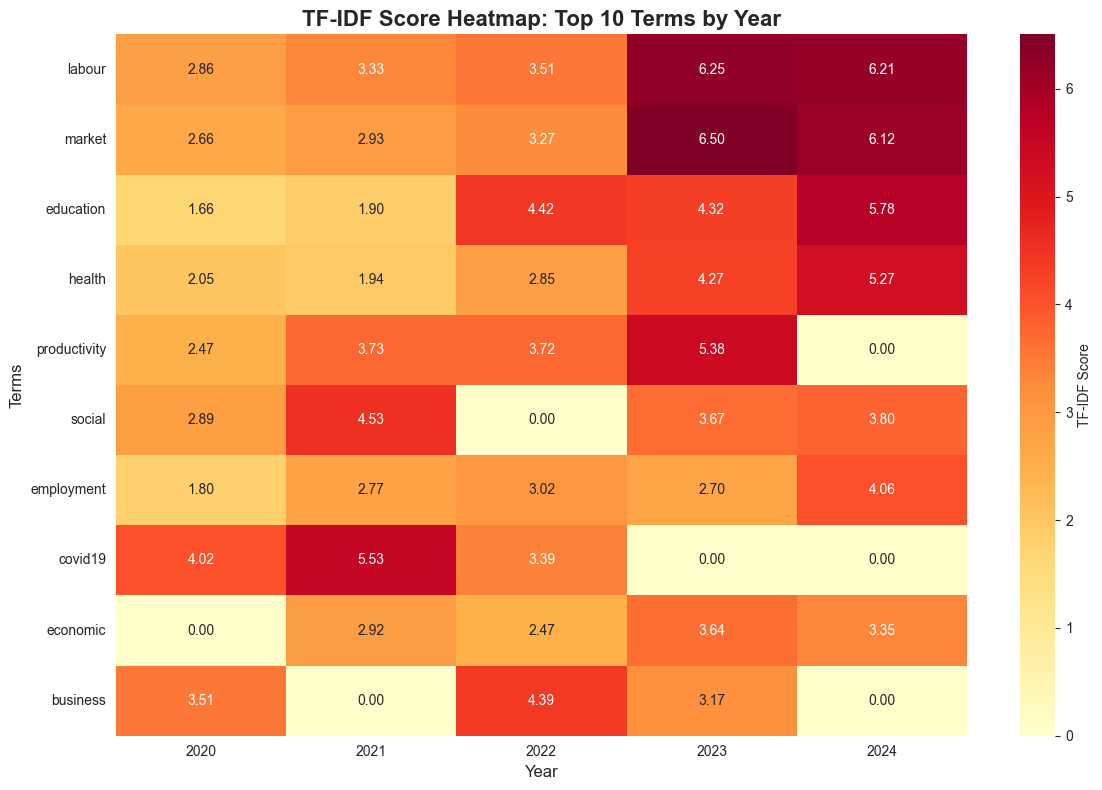

In [438]:
# Additional analysis: Create a heatmap of term scores by year
plt.figure(figsize=(12, 8))

# Create matrix for heatmap
heatmap_data = []
for term in top_10_term_names:
    row = []
    for year in years:
        score = tfidf_dict_by_year[year].get(term, 0)
        row.append(score)
    heatmap_data.append(row)

# Create heatmap
sns.heatmap(heatmap_data, 
            xticklabels=years, 
            yticklabels=top_10_term_names,
            cmap='YlOrRd',
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'TF-IDF Score'})

plt.title('TF-IDF Score Heatmap: Top 10 Terms by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Terms', fontsize=12)
plt.tight_layout()
plt.show()

- Some terms like 'labour', 'market', 'employment' and 'productivity' reasonably consistent over time
- Others like 'health' and 'education' steadily growing (presumably tracking growth in datasets containing information in these domains accessible through the DEA)
- The term 'covid19' rose and fell rapidly in project titles over the course of the observed time period

In [439]:
# Word frequency analysis instead of TF-IDF
def top_frequency_dict(docs, n=20):
    """Count word frequencies across all documents"""
    # Combine all documents into one text
    all_text = ' '.join(docs)
    
    # Split into words and count frequencies
    words = all_text.split()
    word_counts = Counter(words)
    
    # Remove custom stopwords
    filtered_counts = {word: count for word, count in word_counts.items() 
                      if word not in custom_stopwords}
    
    # Get top n terms
    top_terms = dict(word_counts.most_common(n))
    return top_terms

def calculate_word_percentages(docs, target_words):
    """Calculate what percentage of documents contain specific target words"""
    total_docs = len(docs)
    word_percentages = {}
    
    for word in target_words:
        # Count documents containing this word
        count = sum(1 for doc in docs if word in doc.lower())
        percentage = (count / total_docs) * 100
        word_percentages[word] = {
            'count': count,
            'total_docs': total_docs,
            'percentage': percentage
        }
    
    return word_percentages

# Filter data - exclude 2019 and 2025, include 2020-2024
df_filtered = df[(df['Accreditation Date Year'] >= 2020) & (df['Accreditation Date Year'] < 2025)]

# Calculate frequency dictionaries by year
freq_dict_by_year = {}
docs_per_year = {}

for year, group in df_filtered.groupby('Accreditation Date Year'):
    freq_dict_by_year[year] = top_frequency_dict(group['processed_titles'])
    docs_per_year[year] = len(group)

# Print number of documents per year
print("Documents per year:")
for year in sorted(docs_per_year.keys()):
    print(f"{year}: {docs_per_year[year]} projects")

# Get all unique terms across all years
all_terms = set()
for year_dict in freq_dict_by_year.values():
    all_terms.update(year_dict.keys())

# Find top 10 terms by total frequency across all years
term_totals = {}
for term in all_terms:
    total = sum(year_dict.get(term, 0) for year_dict in freq_dict_by_year.values())
    term_totals[term] = total

top_10_terms = sorted(term_totals.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_term_names = [term for term, _ in top_10_terms]

print(f"\nTop 10 most frequent terms across all years:")
for term, count in top_10_terms:
    print(f"{term}: {count} total occurrences")

# Create DataFrame for plotting (absolute frequencies)
years = sorted(freq_dict_by_year.keys())
data_for_plot = []

for term in top_10_term_names:
    for year in years:
        count = freq_dict_by_year[year].get(term, 0)
        data_for_plot.append({
            'Year': year,
            'Term': term,
            'Frequency': count
        })

plot_df = pd.DataFrame(data_for_plot)

# Create DataFrame for plotting (percentage of projects)
percentage_data = []
for term in top_10_term_names:
    for year in years:
        year_group = df_filtered[df_filtered['Accreditation Date Year'] == year]
        total_projects = len(year_group)
        projects_with_term = sum(1 for title in year_group['processed_titles'] if term in title)
        percentage = (projects_with_term / total_projects) * 100 if total_projects > 0 else 0
        
        percentage_data.append({
            'Year': year,
            'Term': term,
            'Percentage': percentage,
            'Count': projects_with_term,
            'Total_Projects': total_projects
        })

percentage_df = pd.DataFrame(percentage_data)

# Special analysis for COVID-19 terms
covid_terms = ['covid', 'covid19', 'coronavirus', 'pandemic']
print(f"\n=== COVID-19 RESEARCH ANALYSIS ===")

covid_analysis = {}
for year in years:
    year_group = df_filtered[df_filtered['Accreditation Date Year'] == year]
    total_projects = len(year_group)
    
    # Count projects with any COVID-related term
    covid_projects = 0
    for title in year_group['processed_titles']:
        if any(covid_term in title.lower() for covid_term in covid_terms):
            covid_projects += 1
    
    covid_percentage = (covid_projects / total_projects) * 100 if total_projects > 0 else 0
    covid_analysis[year] = {
        'covid_projects': covid_projects,
        'total_projects': total_projects,
        'percentage': covid_percentage
    }
    
    print(f"{year}: {covid_projects}/{total_projects} projects ({covid_percentage:.1f}%) mentioned COVID-related terms")

# Find peak and current COVID research levels
covid_percentages = [data['percentage'] for data in covid_analysis.values()]
peak_covid_year = max(covid_analysis.keys(), key=lambda year: covid_analysis[year]['percentage'])
current_covid_percentage = covid_analysis[2024]['percentage']  # 2024 is most recent year
peak_covid_percentage = covid_analysis[peak_covid_year]['percentage']

print(f"\nCOVID Research Peak: {peak_covid_percentage:.1f}% in {peak_covid_year}")
print(f"COVID Research in 2024: {current_covid_percentage:.1f}%")
print(f"Decline: {peak_covid_percentage - current_covid_percentage:.1f} percentage points")


Documents per year:
2020: 116 projects
2021: 156 projects
2022: 197 projects
2023: 211 projects
2024: 224 projects

Top 10 most frequent terms across all years:
labour: 72 total occurrences
market: 68 total occurrences
health: 57 total occurrences
social: 56 total occurrences
education: 54 total occurrences
covid19: 46 total occurrences
productivity: 42 total occurrences
economic: 36 total occurrences
employment: 32 total occurrences
business: 30 total occurrences

=== COVID-19 RESEARCH ANALYSIS ===
2020: 16/116 projects (13.8%) mentioned COVID-related terms
2021: 26/156 projects (16.7%) mentioned COVID-related terms
2022: 14/197 projects (7.1%) mentioned COVID-related terms
2023: 3/211 projects (1.4%) mentioned COVID-related terms
2024: 6/224 projects (2.7%) mentioned COVID-related terms

COVID Research Peak: 16.7% in 2021
COVID Research in 2024: 2.7%
Decline: 14.0 percentage points


### Figure 10: Term usage trends in DEA Projects: Percentage of project titles mentioning top 10 terms
This figure shows the proportion of DEA-accredited research projects each year (2020–2024) that mention selected key terms in their titles. Each subplot tracks a different term from the top 10 most frequent across the dataset, highlighting the share of projects in which that term appears. Unlike TF-IDF, this metric reflects raw occurrence rates (% of total projects) and provides a straightforward view of term popularity over time. For example, covid19 peaked in 2021 and declined thereafter, while education and health steadily gained prominence. This helps communicate a more-easily understandable metric than TF-IDF scores.

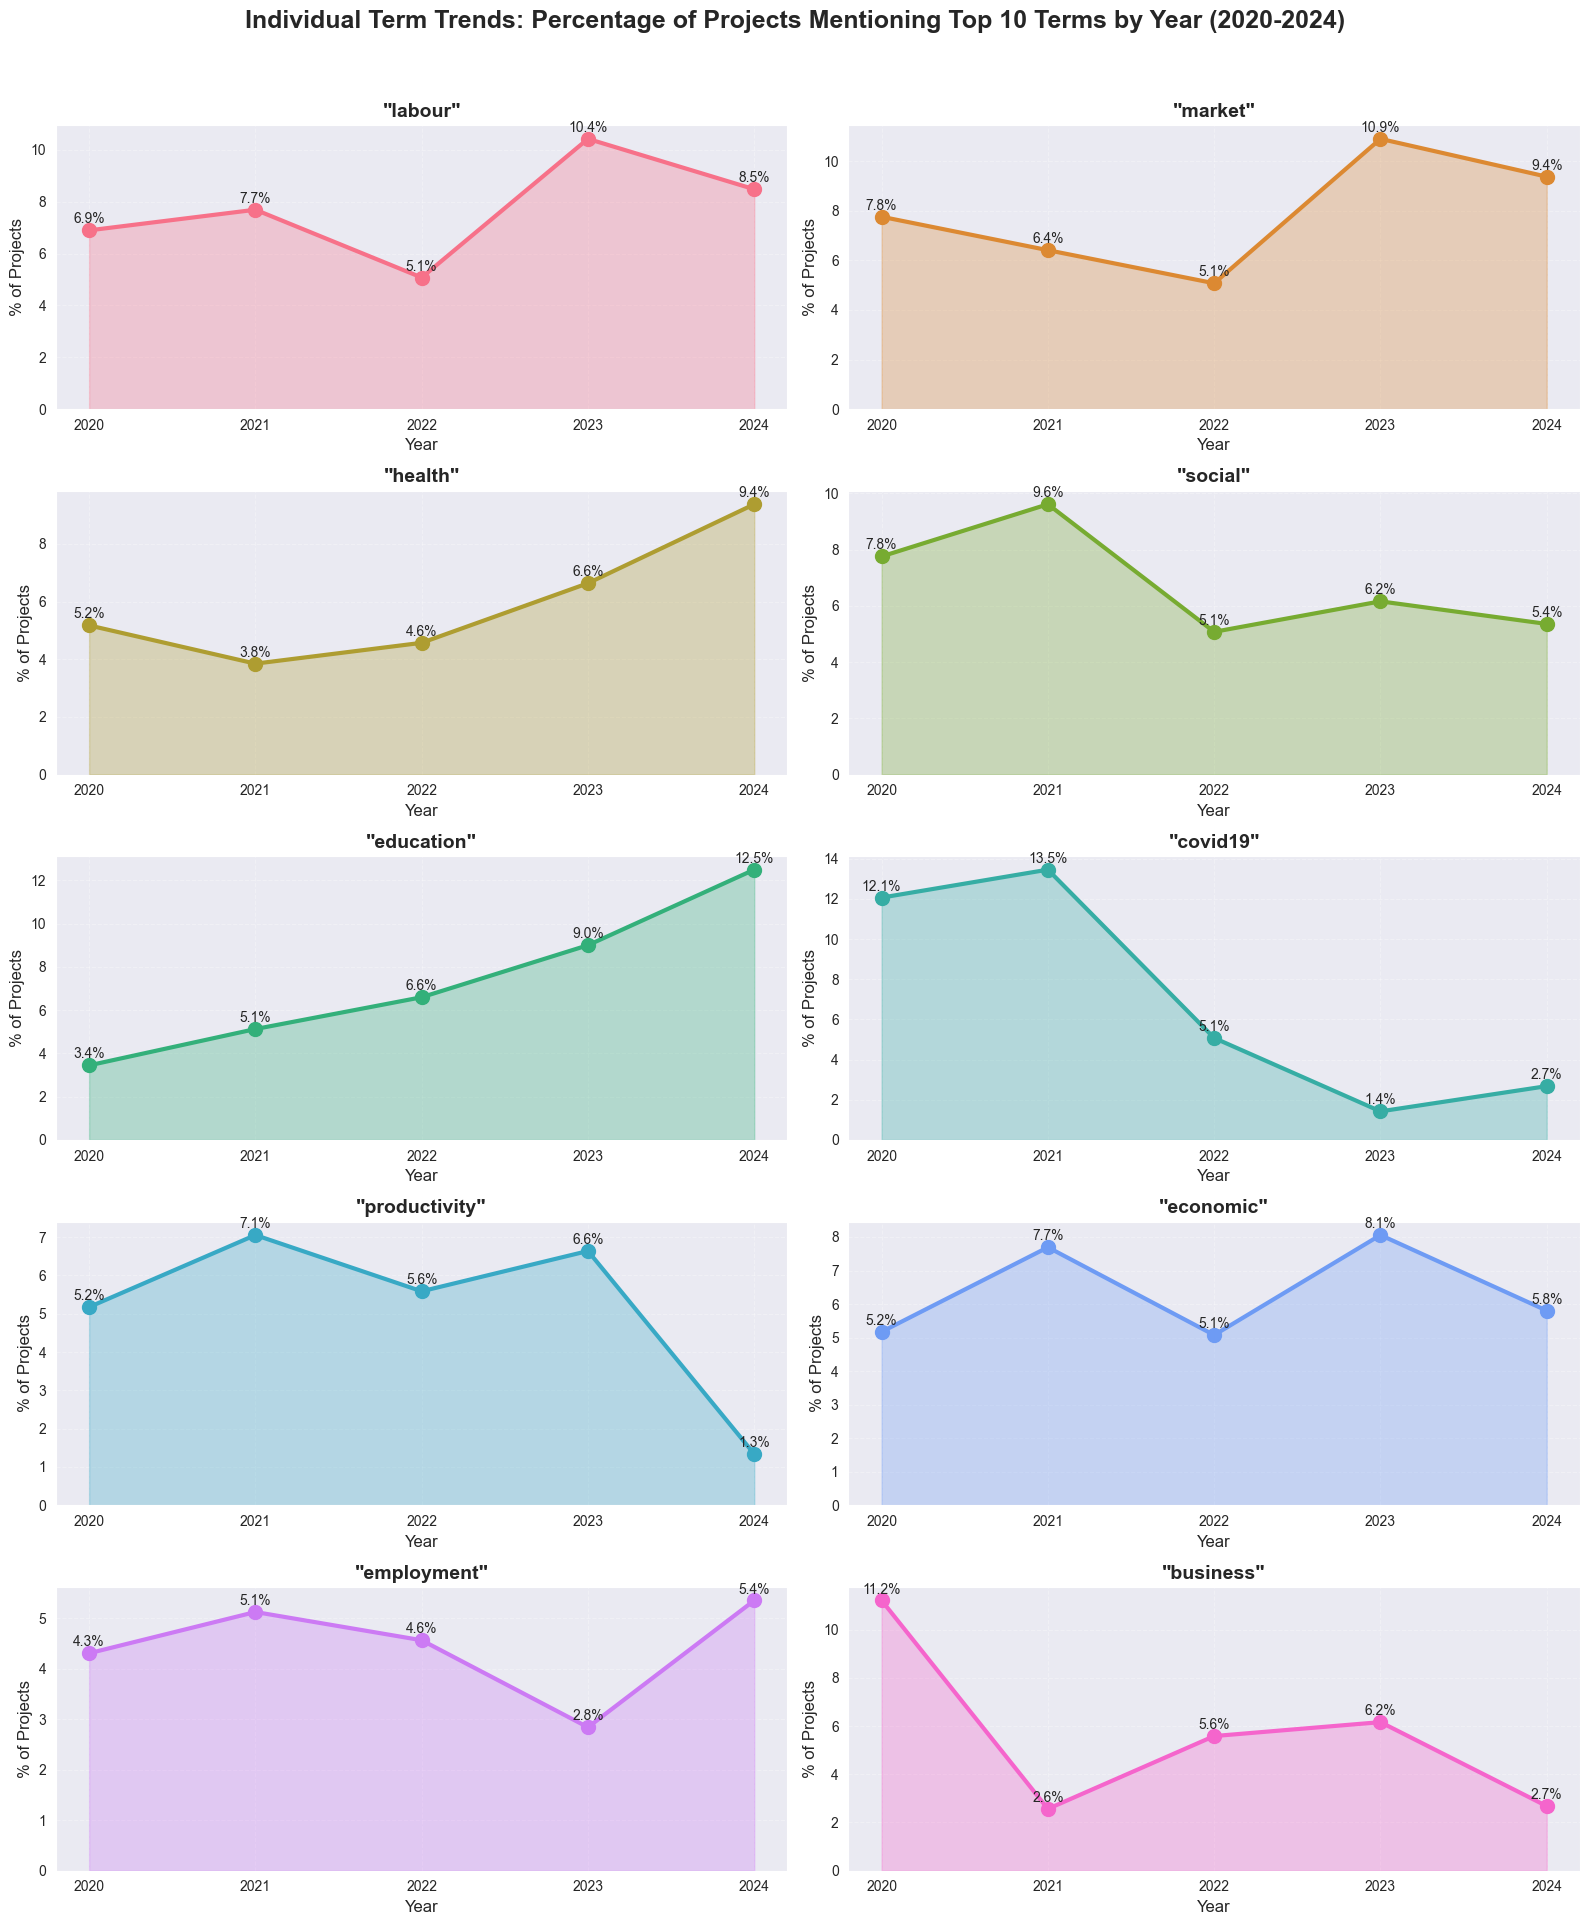


=== SUMMARY TABLE: TERM USAGE BY YEAR ===
Year          2020  2021  2022  2023  2024
Term                                      
business      11.2   2.6   5.6   6.2   2.7
covid19       12.1  13.5   5.1   1.4   2.7
economic       5.2   7.7   5.1   8.1   5.8
education      3.4   5.1   6.6   9.0  12.5
employment     4.3   5.1   4.6   2.8   5.4
health         5.2   3.8   4.6   6.6   9.4
labour         6.9   7.7   5.1  10.4   8.5
market         7.8   6.4   5.1  10.9   9.4
productivity   5.2   7.1   5.6   6.6   1.3
social         7.8   9.6   5.1   6.2   5.4


In [440]:
# Plotting
colors = sns.color_palette("husl", 10)

# Create individual subplots for each term (showing percentages)
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()

for i, term in enumerate(top_10_term_names):
    ax = axes[i]
    term_data = percentage_df[percentage_df['Term'] == term]
    
    ax.plot(term_data['Year'], term_data['Percentage'],
            marker='o', linewidth=3, markersize=10,
            color=colors[i])
    
    # Fill area under the line
    ax.fill_between(term_data['Year'], term_data['Percentage'],
                    alpha=0.3, color=colors[i])
    
    # Add value labels
    for x, y in zip(term_data['Year'], term_data['Percentage']):
        if y > 0:
            ax.annotate(f'{y:.1f}%', (x, y),
                       textcoords="offset points", xytext=(0,5),
                       ha='center', fontsize=10)
    
    ax.set_title(f'"{term}"', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('% of Projects', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Set y-axis to start at 0
    ax.set_ylim(bottom=0)
    
    # Set x-axis to show all years
    ax.set_xticks(years)
    ax.set_xticklabels(years)

# Add main title with extra padding
fig.suptitle('Individual Term Trends: Percentage of Projects Mentioning Top 10 Terms by Year (2020-2024)',
             fontsize=18, fontweight='bold', y=0.98)

# Adjust layout with extra top padding
plt.tight_layout(rect=[0, 0.02, 1, 0.96])
plt.show()

# Create a summary table for easy reference
print(f"\n=== SUMMARY TABLE: TERM USAGE BY YEAR ===")
summary_table = percentage_df.pivot(index='Term', columns='Year', values='Percentage').round(1)
print(summary_table)

# Future possible directions

## Part 1: Dataset access trends
**Methodological improvements**:
- Fit a more complex model for growth in the use of different linked datasets to improve forecasts on future demand for flagship datasets and support better capacity plannning 
    - Add significance test for growth trends
    - Cross-dataset synergies (network analysis of dataset combinations)
- incorporate flagship datasets from ADR UK partners in the devolved adminstrations
- Incorporate the popular MoJ-DfE linkage dataset into the Data First collection counts

**Additional questions**:
- Look at flagship dataset investment level to better understand the value for money in supporting different linkages in terms of their demand
- Develop the impact measurement with the addition of known research outputs (publications, policy briefs etc.) linked to approved project data
- User segmentation: what kind of research organsations (universities, government, third sector) are using these data? Are there centres of research activity using particular datasets? 

**Other potential developments**
- Improve the transparency and accessibilty of the public register, providing a fully searchable and filterable web-based dataset for the public to better understand the research that is being undertaken using their data.
- Produce a web-based dashboard live-fed with data from the register to allow for automatically updated and easy-to-interpret visualisations of dataset use and research themes
- Produce an interactive dashboard where members of the public can enter basic personal details, and return the datasets (and therefore projects) that their data has been used in, providing a direct link between individuals' data and public benefit (espeically if these projects can be further linked to research outputs)

## Part 2: Topic trends in research
**Methodological improvements**
- N-gram analysis to find commonly co-occuring terms for a richer thematic analysis
- Clustering analysis using density-based approaches (e.g. DBSCAN) to improve cluster separation
- Dynamic topic modelling using gensim's Dynamic Topic Model or BERTopic for deeper analysis of changing trends

**Additional questions**
- How do topic trends align with government priorities?

**Other potential developments**
- Produce a recommendation system for researchers, suggesting relevant datasets based on their research questions

# Some limitations in this work
## Data collection and coverage limitations
- the public register only begins in Q4 2019, so early DEA usage and adoption trends since 2017 are not captured
- the public register only includes approved projects. We have no visibility into rejected applications, abandoned projects, or researchers discouraged by perceived barriers who never apply
- the focus on ADR England flagship datasets excludes those from Scotland, Wales, and Northern Ireland, limiting UK-wide insights; 
- the MoJ-DfE linked dataset is omitted from Data First collection counts as it is not accessed via the DEA, potentially understating demand for justice-education data
- web scraping introduces risks of missed entries or parsing errors due to formatting changes which are not always easy to detect

## Technical and methodological constraints
- growth projection assumptions: exponential forecasts assume continued trends, but may be limited by funding, researcher capacity, processing delays, policy shifts, or demand saturation.
- title-based topic analysis: project titles may misrepresent research content, leading to misclassification, especially for generic or interdisciplinary studies.
- classification subjectivity: dataset grouping and thematic clustering involved subjective choices that may influence interpretation of trends.
- simple modeling approach: exponential models do not account for seasonality, structural breaks, capacity limits, or network effects across datasets.
- TF-IDF limitations: Lacks ability to detect semantic similarity or shifts in term meaning over time; more advanced NLP methods could yield different insights.
- statistical significance: this is a descriptive analysis only, no hypothesis testing was conducted to assess whether observed trends are statistically meaningful.

These limitations suggest findings should be treated as indicative rather than definitive. The dramatic growth rates observed may not be sustainable, and infrastructure planning should incorporate uncertainty ranges and scenario planning. Future work should address these limitations.

In [441]:
from datetime import datetime
import nbformat
import os


# Load the notebook
input_path = r"C:\Users\balin\Desktop\ADR_DEA_project\analysis\DEA_projects_analysis.ipynb"
nb = nbformat.read(input_path, as_version=4)

# Keep only matplotlib/seaborn outputs (image/png)
for cell in nb.cells:
    if cell.cell_type == "code" and "outputs" in cell:
        cell["outputs"] = [
            output for output in cell["outputs"]
            if "data" in output and "image/png" in output["data"]
        ]

# Save cleaned notebook with today's date
today_str = datetime.now().strftime("%Y%m%d")
output_path = fr"C:\Users\balin\Desktop\ADR_DEA_project\analysis\DEA_projects_analysis_figures_only_{today_str}.ipynb"

with open(output_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

# Convert to HTML
!jupyter nbconvert --to html --no-input "{output_path}"

[NbConvertApp] Converting notebook C:\Users\balin\Desktop\ADR_DEA_project\analysis\DEA_projects_analysis_figures_only_20250527.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 2292606 bytes to C:\Users\balin\Desktop\ADR_DEA_project\analysis\DEA_projects_analysis_figures_only_20250527.html
